#### Libraries

In [2]:
import sys
import robin_stocks.robinhood as r
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
import importlib
import yfinance as yf
import datapackage
import time
import webbrowser
import panel as pn


from IPython.display import Markdown
def printmd(string):
    display(Markdown(string))

#own modules
import tickers_graphing_module as tg
import analysis_module as am
import analytics_functions as af

init_notebook_mode()
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 1000)


In [68]:
import panel as pn
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets
import pandas as pd
import numpy as np
import tickers_graphing_module as tg
import analysis_module as am
import analytics_functions as af
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import importlib
importlib.reload(am)
importlib.reload(tg)
importlib.reload(af)


pn.extension()

button = pn.widgets.Button(name='Get Ticker Stats and Financials', button_type='primary')
text = pn.widgets.TextInput(name = 'Ticker', value='TSLA')
def b(event):
    af.get_share_stats_and_financials(text.value)
    
    
button2 = pn.widgets.Button(name='Swaggy Stocks', button_type='primary')
def c(event):
    af.swaggy_stocks()


button3 = pn.widgets.Button(name='Get Options Chain', button_type='primary')
text3 = pn.widgets.TextInput(name = 'Options Chain Ticker', value='TSLA')
def d(event):
    af.get_options_chain(text3.value)
    
    
button4 = pn.widgets.Button(name='Top Shorted Stocks', button_type='primary')
def e(event):
    af.get_top_shorted_stocks()



button.on_click(b)
button2.on_click(c)
button3.on_click(d)
button4.on_click(e)
dash = pn.Column(text, button, pn.Spacer(height = 5), button2, pn.Spacer(height = 5), text3, button3, pn.Spacer(height = 5), button4)
dash


Column
    [0] TextInput(name='Ticker', value='TSLA')
    [1] Button(button_type='primary', name='Get Ticker Stats a...)
    [2] Spacer(height=5)
    [3] Button(button_type='primary', name='Swaggy Stocks')
    [4] Spacer(height=5)
    [5] TextInput(name='Options Chain Ticker', value='TSLA')
    [6] Button(button_type='primary', name='Get Options Chain')
    [7] Spacer(height=5)
    [8] Button(button_type='primary', name='Top Shorted Stocks')

#### Reimport modules

In [3]:
importlib.reload(am)
importlib.reload(tg)
importlib.reload(af)

<module 'analytics_functions' from '/Users/bhuang321/Desktop/My Stuff/Investing/analytics_functions.py'>

### Share Statistics and Financials from Yahoo

In [29]:
af.get_share_stats_and_financials('SPY')

### Swaggy stocks WSB Ticker Sentiment

In [135]:
af.swaggy_stocks()

### Options chain from Yahoo

In [29]:
af.get_options_chain('SQSP')

### Top Shorted Stocks

In [67]:
af.get_top_shorted_stocks()

# Ticker Charts

In [4]:
importlib.reload(am)
importlib.reload(tg)
importlib.reload(af)

<module 'analytics_functions' from '/Users/bhuang321/Desktop/My Stuff/Investing/analytics_functions.py'>

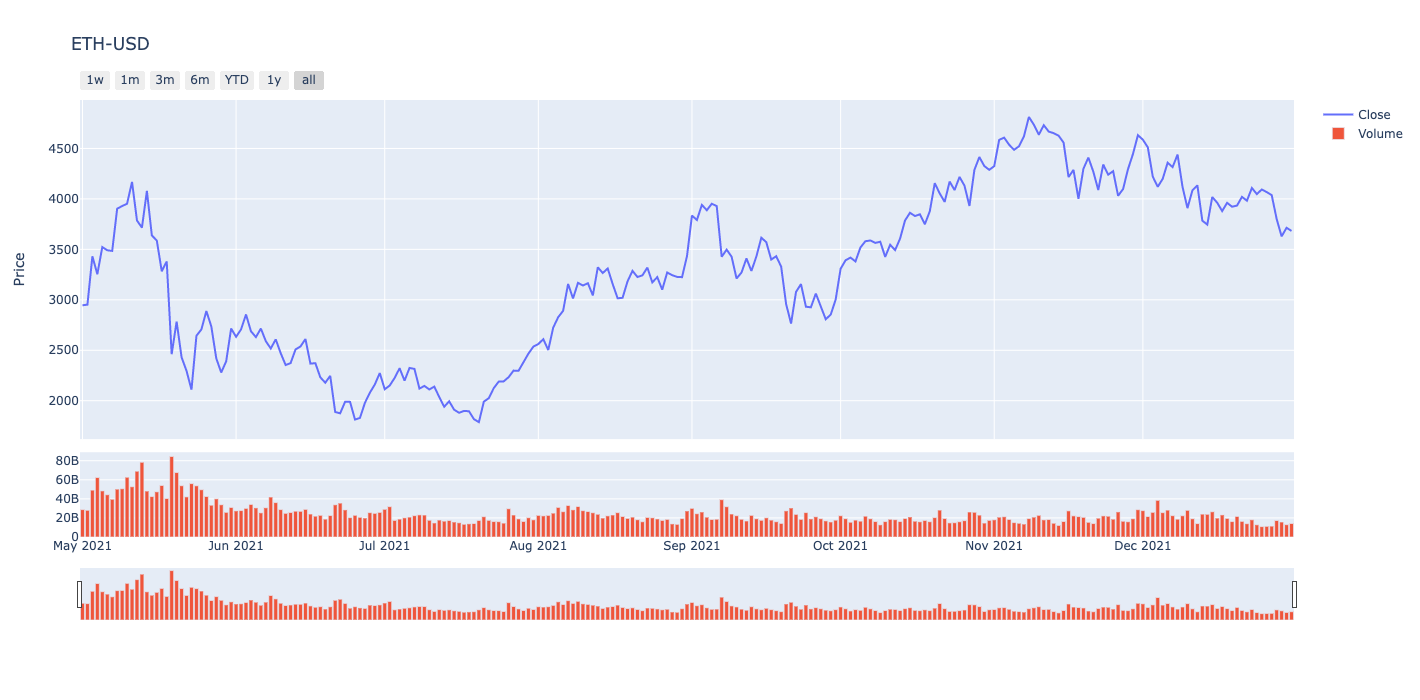

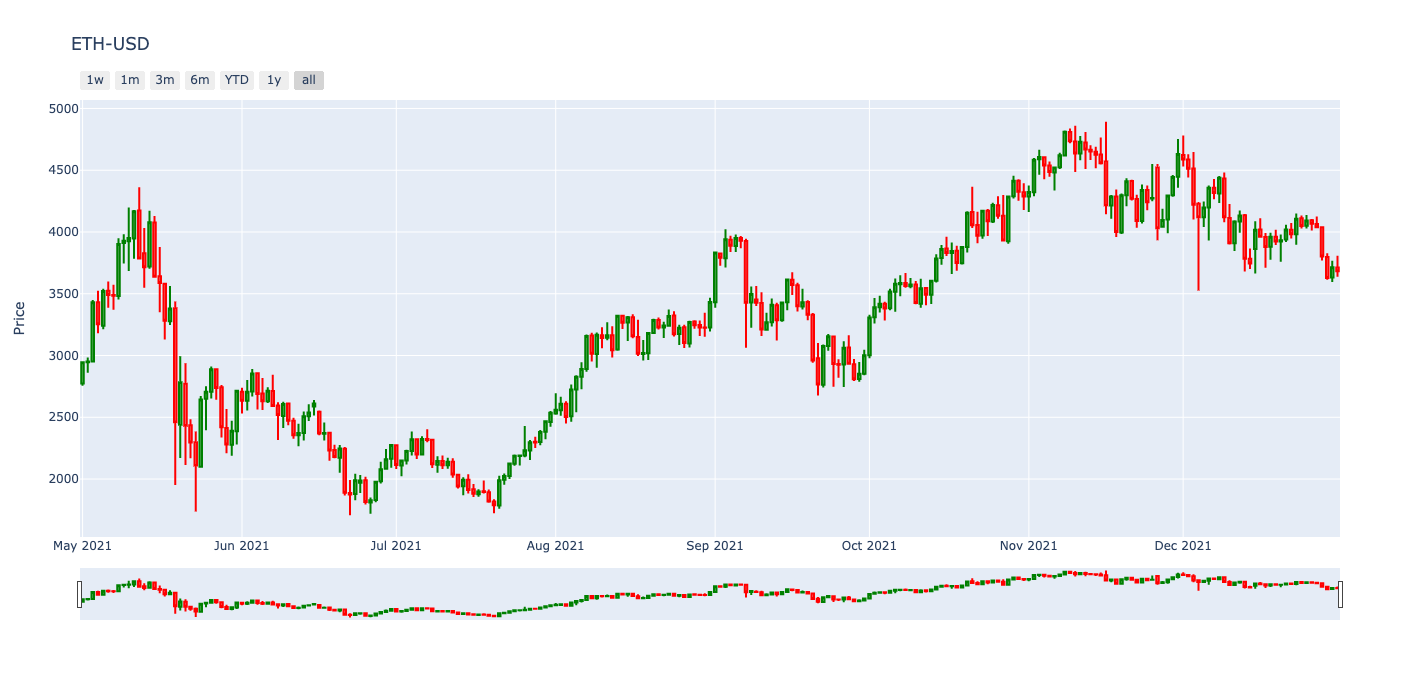

Return in timeframe: 25.01%

Return in 1mo: -9.84%

Return in 3mo: -14.87%

Return in 6mo: 13.51%

In [14]:
tg.plot_and_get_info('ETH-USD', start = '2021-5-1', end = '2021-12-31', moving_avg = 'no', moving_avg_days = 7)

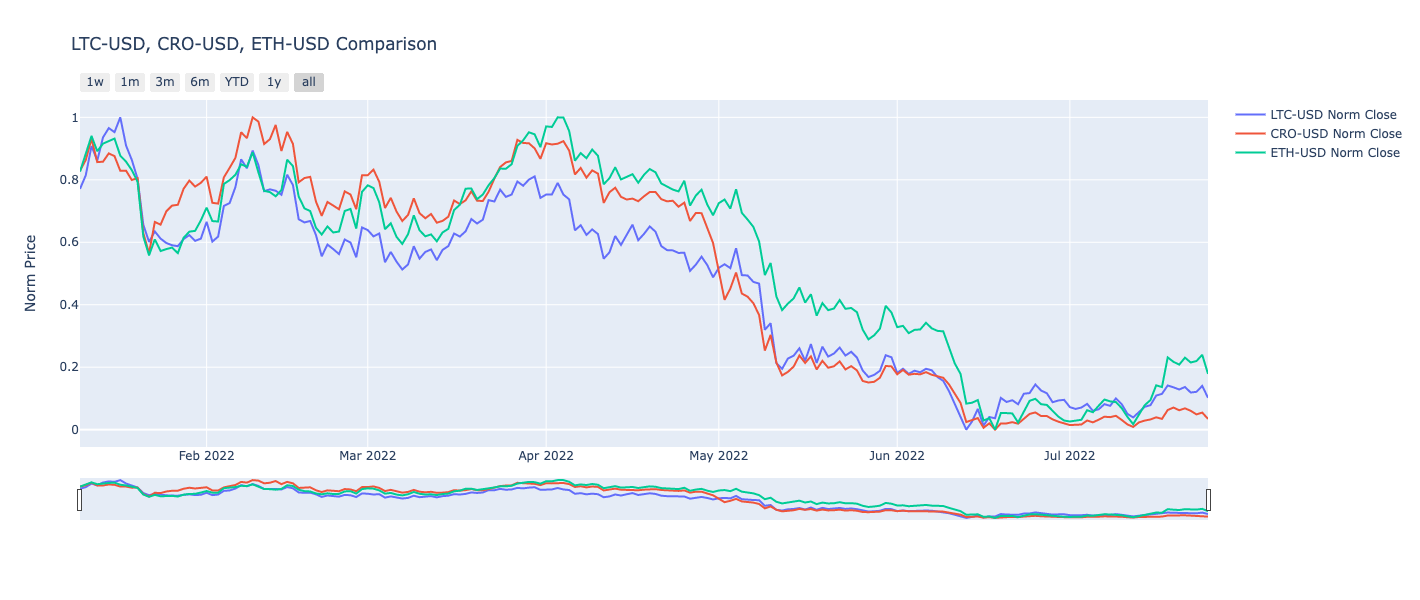

Given Timeframe:

LTC-USD Return: -57.14%

CRO-USD Return: -72.88%

ETH-USD Return: -53.12%

Last 90 Days Close Pearson Correlation Matrix: 

LTC-USD   CRO-USD   ETH-USD
LTC-USD  1.000000  0.960660  0.962274
CRO-USD  0.960660  1.000000  0.952434
ETH-USD  0.962274  0.952434  1.000000

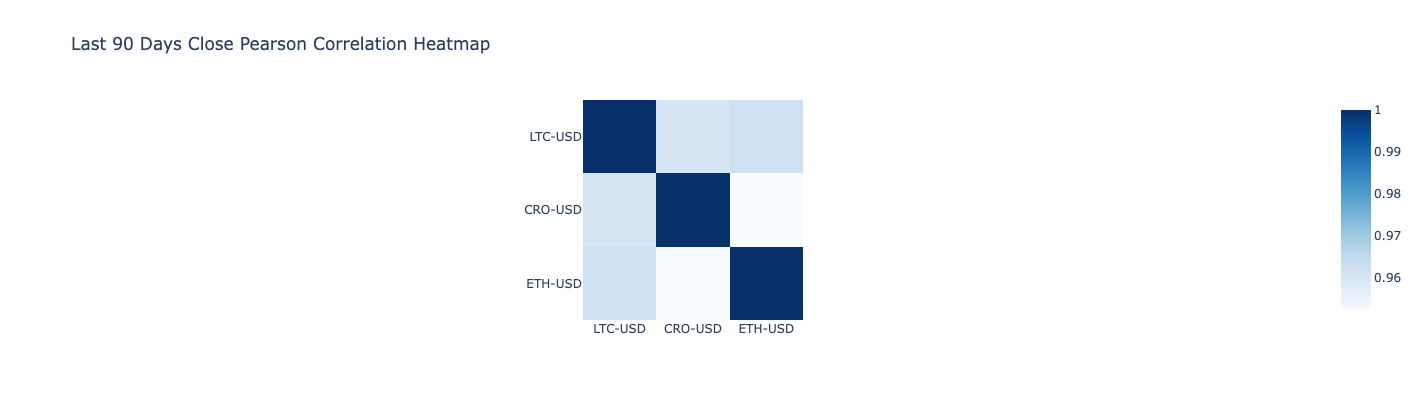

In [16]:
tg.compare_charts(['LTC-USD', 'CRO-USD', 'ETH-USD'], start = '2022-01-10', end = '2022-12-31', ma = 'no')

## Robinhood Login

In [6]:
login = r.login(username = 'brandonhsuperpiero@gmail.com', password = getpass.getpass("Password: "), store_session = False) #don't store session for future logins

Password:  ··············
Please type in the MFA code:  179180


## RH Positions

In [104]:
importlib.reload(am)
importlib.reload(tg)
importlib.reload(af)

<module 'analytics_functions' from '/Users/bhuang/Desktop/Finance/analytics_functions.py'>

In [105]:
positions = am.Positions()

**Stocks:**

ticker   price  quantity  average_buy_price   equity %_equity_change  \
0   BMBL   35.33     116.0              50.28  4098.28         -29.73%   
2     SQ  170.77      12.0             231.38  2049.24         -26.19%   
3   PLTR   18.69     126.0              23.52  2354.94         -20.53%   
4   ROKU  220.74       5.0             323.73  1103.70         -31.81%   
5   BLZE   20.43      41.0              31.23   837.63         -34.59%   
6   TOST   34.00      31.0              44.92  1054.00         -24.31%   
7   DUOL  100.57       4.0             130.28   402.28         -22.80%   
1     FB  333.75      10.0             338.65  3337.50          -1.45%   

   equity_change                   name    pe_ratio  \
0       -1734.22                 Bumble   13.370300   
2        -727.31                  Block  166.499000   
3        -608.53  Palantir Technologies        None   
4        -514.95                   Roku  109.309000   
5        -442.97              Backblaze        None   
6        -338.60                  Toast        None   
7        -118.82               Duolingo        None   
1         -49.04         Meta Platforms   23.882100   

   %_of_portfolio_market_value  
0                        24.34  
2                        12.17  
3                        13.98  
4                         6.55  
5                         4.97  
6                         6.26  
7                         2.39  
1                        19.82

Total Stock Equity: $ 15237.57

Total Unrealized Stock Gain: $ 0

Total Unrealized Stock Loss: $ -4534.44

**Options:**

chain_symbol expiration_date  strike_price  average_price  type  quantity  \
0         BMBL      2022-01-21          35.0          470.0  long       1.0   
1         ROKU      2022-02-18         155.0          500.0  long       1.0   
2           SQ      2022-02-18         160.0          605.0  long       1.0   

   market_price  equity  equity_change %_equity_change  \
0         285.0   285.0         -185.0         -39.36%   
1         348.0   348.0         -152.0          -30.4%   
2         970.0   970.0          365.0          60.33%   

   %_of_portfolio_market_value  
0                         1.69  
1                         2.07  
2                         5.76

Total Options Equity: $ 1603.0

Total Unrealized Options Gain: $ 365.0

Total Unrealized Options Loss: $ -337.0

**Crypto:**

currency  quantity  average_cost_basis  market_price  equity  equity_change  \
0      ETC       0.0                 NaN         35.12     0.0            NaN   
1      LTC       0.0                 NaN        151.06     0.0            NaN   
2     DOGE       0.0                 NaN          0.18     0.0            NaN   
3      ETH       0.0                 NaN       3852.51     0.0            NaN   
4      BTC       0.0                 NaN      48132.30     0.0            NaN   

  %_equity_change  %_of_portfolio_market_value  
0            nan%                          0.0  
1            nan%                          0.0  
2            nan%                          0.0  
3            nan%                          0.0  
4            nan%                          0.0

Total Crypto Equity: $ 0.0

Total Unrealized Crypto Gain: $ 0

Total Unrealized Crypto Loss: $ 0

Total Stock, Option, and Crypto Equity: $ 16840.57

Total runtime: 4.19s

# RH Watchlists

### Print all watchlists

In [102]:
watchlists = af.Watchlists()

Watchlists: 
 ['Investing/Trading', 'Eyeing', 'Eyeing2', 'Research', 'Take profits', 'Short', 'To pick up', 'Crypto', 'For hedging', 'Market', 'ETF', 'Travel', 'Discovered', 'Platform tech', 'Software', 'IPO', 'EV', 'Big Tech', 'Large Cap', 'Semi', 'Green', 'Spac', 'Wrong about', 'Right about', 'Banks', 'Stores', 'Other', 'Short ETFs', 'Heard', 'WSB', 'Auto', 'Healthcare', 'Daily Movers']


### Get positions' tickers

In [103]:
am.get_positions_tickers()

Positions: ['BMBL', 'FB', 'SQ', 'PLTR', 'ROKU', 'BLZE', 'TOST', 'DUOL']


### Get stock movements in a watchlist

In [28]:
af.get_stock_movements(tickers = watchlists.get_watchlist_tickers(watchlist_name = 'Semi'), period = '1mo', point_of_reference = -2)

From 2021-12-03 00:00:00 to 2021-12-06 00:00:00

AMD: -3.44%

ON: -3.33%

XLNX: -1.68%

NXPI: -1.25%

QCOM: -0.6%

TSM: -0.16%

TXN: 0.64%

LRCX: 0.92%

MU: 1.02%

AMAT: 1.06%

LSCC: 1.13%

AVGO: 1.23%

### Filter by upwards movement

In [123]:
#valid data periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
af.filter_stocks_by_movement(watchlist_names = watchlists.watchlists[:-1], period = '1mo', point_of_reference_days = -2, return_threshold = 0.001, show_yesterday = 'yes')

Past 2 days

**Investing/Trading**

Last date in data: 2021-12-14 00:00:00

From 2021-12-13 to 2021-12-14

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-15 00:00:00

LTC-USD- Change: 3.73%, Yesterday Change: 1.06%

Last date in data: 2021-12-14 00:00:00

FSR- Change: 0.81%, Yesterday Change: -3.6%

Last date in data: 2021-12-14 00:00:00

BMBL- Change: 0.91%, Yesterday Change: -3.66%

Last date in data: 2021-12-14 00:00:00

PLTR- Change: 1.3%, Yesterday Change: -2.93%

Last date in data: 2021-12-14 00:00:00

BABA- Change: 3.55%, Yesterday Change: -2.31%

Last date in data: 2021-12-14 00:00:00

LCID- Change: 4.39%, Yesterday Change: 3.81%

Perc of symbols: 18.75%

**Eyeing**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-15 00:00:00

ETH-USD- Change: 3.31%, Yesterday Change: -1.04%

Last date in data: 2021-12-15 00:00:00

DOGE-USD- Change: 0.18%, Yesterday Change: 12.54%

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

OTLY- Change: 0.12%, Yesterday Change: -3.79%

Last date in data: 2021-12-14 00:00:00

U- Change: 0.18%, Yesterday Change: 0.2%

Last date in data: 2021-12-14 00:00:00

PYPL- Change: 0.23%, Yesterday Change: -1.14%

Last date in data: 2021-12-14 00:00:00

CWST- Change: 0.45%, Yesterday Change: -1.45%

Last date in data: 2021-12-14 00:00:00

NVDA- Change: 0.62%, Yesterday Change: -7.23%

Last date in data: 2021-12-14 00:00:00

SMPL- Change: 0.64%, Yesterday Change: 0.85%

Last date in data: 2021-12-14 00:00:00

BBY- Change: 1.13%, Yesterday Change: -2.87%

Last date in data: 2021-12-14 00:00:00

BGFV- Change: 1.34%, Yesterday Change: -6.35%

Last date in data: 2021-12-14 00:00:00

LYFT- Change: 1.48%, Yesterday Change: -2.86%

Last date in data: 2021-12-14 00:00:00

ONON- Change: 1.5%, Yesterday Change: -6.27%

Last date in data: 2021-12-14 00:00:00

COIN- Change: 1.79%, Yesterday Change: -1.75%

Last date in data: 2021-12-14 00:00:00

POSH- Change: 3.33%, Yesterday Change: -4.18%

Last date in data: 2021-12-14 00:00:00

DOCU- Change: 3.36%, Yesterday Change: -3.37%

Last date in data: 2021-12-14 00:00:00

DUOL- Change: 3.59%, Yesterday Change: 1.43%

Last date in data: 2021-12-14 00:00:00

ARBK- Change: 3.67%, Yesterday Change: -7.67%

Last date in data: 2021-12-14 00:00:00

AMC- Change: 5.42%, Yesterday Change: -18.07%

Last date in data: 2021-12-14 00:00:00

FCUV- Change: 8.32%, Yesterday Change: -24.88%

Perc of symbols: 22.47%

**Eyeing2**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

ASAN- Change: 1.12%, Yesterday Change: -5.78%

Last date in data: 2021-12-14 00:00:00

MARA- Change: 1.33%, Yesterday Change: -9.77%

Last date in data: 2021-12-14 00:00:00

MRNA- Change: 1.9%, Yesterday Change: 5.49%

Perc of symbols: 20.0%

**Research**

Perc of symbols: 12.5%

**Take profits**

Perc of symbols: 50.0%

**Short**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 20.0%

**To pick up**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

CRSP- Change: 2.18%, Yesterday Change: -0.86%

Perc of symbols: 40.0%

**Crypto**

Last date in data: 2021-12-15 00:00:00

XRP-USD- Change: 1.85%, Yesterday Change: 1.68%

Last date in data: 2021-12-15 00:00:00

BTC-USD- Change: 3.56%, Yesterday Change: -0.27%

Last date in data: 2021-12-15 00:00:00

BSV-USD- Change: 3.92%, Yesterday Change: -2.82%

Perc of symbols: 100.0%

**For hedging**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 0.0%

**Market**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

UVXY- Change: 2.73%, Yesterday Change: 5.21%

Perc of symbols: 14.29%

**ETF**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

FAS- Change: 1.94%, Yesterday Change: -3.67%

Last date in data: 2021-12-14 00:00:00

DPST- Change: 2.89%, Yesterday Change: -8.09%

Perc of symbols: 11.11%

**Travel**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

MAR- Change: 0.21%, Yesterday Change: -4.64%

Perc of symbols: 7.14%

**Discovered**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

RH- Change: 0.18%, Yesterday Change: -6.31%

Last date in data: 2021-12-14 00:00:00

BBWI- Change: 0.91%, Yesterday Change: -5.06%

Last date in data: 2021-12-14 00:00:00

CZR- Change: 1.1%, Yesterday Change: -4.41%

Last date in data: 2021-12-14 00:00:00

GPS- Change: 1.23%, Yesterday Change: -3.92%

Last date in data: 2021-12-14 00:00:00

CF- Change: 1.67%, Yesterday Change: 0.08%

Last date in data: 2021-12-14 00:00:00

M- Change: 3.33%, Yesterday Change: -7.13%

Last date in data: 2021-12-14 00:00:00

GTLB- Change: 6.06%, Yesterday Change: -3.09%

Perc of symbols: 53.85%

**Platform tech**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

W- Change: 0.27%, Yesterday Change: 1.71%

Last date in data: 2021-12-14 00:00:00

UBER- Change: 4.28%, Yesterday Change: -2.63%

Perc of symbols: 23.53%

**Software**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

BIGC- Change: 0.27%, Yesterday Change: -3.55%

Perc of symbols: 14.29%

**IPO**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

NRDS- Change: 6.11%, Yesterday Change: -13.62%

Last date in data: 2021-12-14 00:00:00

BIRD- Change: 17.59%, Yesterday Change: -7.72%

Perc of symbols: 30.0%

**EV**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 10.0%

**Big Tech**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 18.18%

**Large Cap**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 14.29%

**Semi**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

XLNX- Change: 0.14%, Yesterday Change: -3.66%

Last date in data: 2021-12-14 00:00:00

AMAT- Change: 0.43%, Yesterday Change: -3.83%

Last date in data: 2021-12-14 00:00:00

ON- Change: 0.64%, Yesterday Change: -4.28%

Last date in data: 2021-12-14 00:00:00

AMD- Change: 1.35%, Yesterday Change: -3.55%

Perc of symbols: 33.33%

**Green**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 0.0%

**Spac**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

FTCV- Change: 0.1%, Yesterday Change: -0.8%

Last date in data: 2021-12-14 00:00:00

IPOF- Change: 0.68%, Yesterday Change: -0.77%

Perc of symbols: 15.38%

**Wrong about**

Perc of symbols: 16.67%

**Right about**

Last date in data: 2021-12-14 00:00:00

DFS- Change: 2.37%, Yesterday Change: -3.47%

Perc of symbols: 100.0%

**Banks**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

WFC- Change: 0.68%, Yesterday Change: -3.38%

Last date in data: 2021-12-14 00:00:00

BCS- Change: 0.73%, Yesterday Change: -2.82%

Last date in data: 2021-12-14 00:00:00

C- Change: 0.76%, Yesterday Change: -0.88%

Last date in data: 2021-12-14 00:00:00

JPM- Change: 0.77%, Yesterday Change: -1.2%

Last date in data: 2021-12-14 00:00:00

USB- Change: 0.86%, Yesterday Change: -1.67%

Last date in data: 2021-12-14 00:00:00

DB- Change: 0.9%, Yesterday Change: -1.72%

Last date in data: 2021-12-14 00:00:00

SYF- Change: 1.06%, Yesterday Change: -3.3%

Last date in data: 2021-12-14 00:00:00

HSBC- Change: 1.13%, Yesterday Change: -2.39%

Last date in data: 2021-12-14 00:00:00

BK- Change: 1.16%, Yesterday Change: -1.07%

Last date in data: 2021-12-14 00:00:00

BAC- Change: 1.26%, Yesterday Change: -2.16%

Last date in data: 2021-12-14 00:00:00

COF- Change: 1.29%, Yesterday Change: -2.99%

Last date in data: 2021-12-14 00:00:00

PNC- Change: 1.33%, Yesterday Change: -2.73%

Last date in data: 2021-12-14 00:00:00

SBNY- Change: 1.43%, Yesterday Change: -3.17%

Last date in data: 2021-12-14 00:00:00

ALLY- Change: 1.91%, Yesterday Change: -3.07%

Perc of symbols: 78.95%

**Stores**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

SHAK- Change: 0.24%, Yesterday Change: -4.03%

Last date in data: 2021-12-14 00:00:00

WING- Change: 0.29%, Yesterday Change: -0.06%

Last date in data: 2021-12-14 00:00:00

PLNT- Change: 0.78%, Yesterday Change: -2.9%

Perc of symbols: 33.33%

**Other**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

BYND- Change: 9.29%, Yesterday Change: -1.72%

Perc of symbols: 44.44%

**Short ETFs**

Last date in data: 2021-12-14 00:00:00

SH- Change: 0.72%, Yesterday Change: 0.86%

Last date in data: 2021-12-14 00:00:00

SOXS- Change: 1.01%, Yesterday Change: 7.34%

Last date in data: 2021-12-14 00:00:00

SPXS- Change: 2.22%, Yesterday Change: 2.5%

Last date in data: 2021-12-14 00:00:00

SQQQ- Change: 3.02%, Yesterday Change: 4.29%

Last date in data: 2021-12-14 00:00:00

TECS- Change: 4.69%, Yesterday Change: 4.59%

Perc of symbols: 100.0%

**Heard**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

RIOT- Change: 2.3%, Yesterday Change: -6.69%

Last date in data: 2021-12-14 00:00:00

EBON- Change: 20.16%, Yesterday Change: -7.26%

Perc of symbols: 15.0%

**WSB**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

RKT- Change: 0.13%, Yesterday Change: -1.64%

Last date in data: 2021-12-14 00:00:00

GME- Change: 7.9%, Yesterday Change: -16.17%

Perc of symbols: 21.43%

**Auto**

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 0.0%

**Healthcare**

Perc of symbols: 50.0%


{'LTC-USD': '3.73% return', 'FSR': '0.81% return', 'BMBL': '0.91% return', 'PLTR': '1.3% return', 'BABA': '3.55% return', 'LCID': '4.39% return', 'ETH-USD': '3.31% return', 'DOGE-USD': '0.18% return', 'OTLY': '0.12% return', 'U': '0.18% return', 'PYPL': '0.23% return', 'CWST': '0.45% return', 'NVDA': '0.62% return', 'SMPL': '0.64% return', 'BBY': '1.13% return', 'BGFV': '1.34% return', 'LYFT': '1.48% return', 'ONON': '1.5% return', 'COIN': '1.79% return', 'POSH': '3.33% return', 'DOCU': '3.36% return', 'DUOL': '3.59% return', 'ARBK': '3.67% return', 'AMC': '5.42% return', 'FCUV': '8.32% return', 'ASAN': '1.12% return', 'MARA': '1.33% return', 'MRNA': '1.9% return', 'CRSP': '2.18% return', 'XRP-USD': '1.85% return', 'BTC-USD': '3.56% return', 'BSV-USD': '3.92% return', 'UVXY': '2.73% return', 'FAS': '1.94% return', 'DPST': '2.89% return', 'MAR': '0.21% return', 'RH': '0.18% return', 'BBWI': '0.91% return', 'CZR': '1.1% return', 'GPS': '1.23% return', 'CF': '1.67% return', 'M': '3.33% r

Perc of total symbols: 16.73%

In [111]:
ticker_obj = yf.Ticker('COST')
ticker_hist = ticker_obj.history(period = '1mo')

In [120]:
date.today()

datetime.date(2021, 12, 15)

### Filter by downwards movement

In [133]:
#valid data periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
af.filter_stocks_by_movement(watchlist_names = watchlists.watchlists[:-1], period = '1mo', point_of_reference_days = -2, return_threshold = -0.001, show_yesterday = 'yes')

Past 2 days

**Investing/Trading**

Last date in data: 2021-12-10 00:00:00

From 2021-12-09 to 2021-12-10

OPEN- Change: -0.73%, Yesterday Change: -3.98%

Last date in data: 2021-12-14 00:00:00

NIO- Change: -4.04%, Yesterday Change: -1.78%

Last date in data: 2021-12-14 00:00:00

AI- Change: -3.62%, Yesterday Change: -3.99%

Last date in data: 2021-12-14 00:00:00

TQQQ- Change: -2.98%, Yesterday Change: -4.49%

Last date in data: 2021-12-14 00:00:00

HOOD- Change: -2.89%, Yesterday Change: -2.18%

Last date in data: 2021-12-14 00:00:00

LMND- Change: -2.8%, Yesterday Change: -1.74%

Last date in data: 2021-12-14 00:00:00

SQSP- Change: -2.75%, Yesterday Change: -3.58%

Last date in data: 2021-12-14 00:00:00

BYDDY- Change: -2.16%, Yesterday Change: -2.71%

Last date in data: 2021-12-14 00:00:00

XPEV- Change: -1.88%, Yesterday Change: -3.33%

Last date in data: 2021-12-14 00:00:00

ABNB- Change: -1.8%, Yesterday Change: -5.48%

Last date in data: 2021-12-14 00:00:00

EXPI- Change: -1.71%, Yesterday Change: -5.44%

Last date in data: 2021-12-14 00:00:00

ARRY- Change: -1.69%, Yesterday Change: 2.98%

Last date in data: 2021-12-14 00:00:00

CFLT- Change: -1.38%, Yesterday Change: -1.05%

Last date in data: 2021-12-14 00:00:00

NCLH- Change: -1.21%, Yesterday Change: -4.61%

Last date in data: 2021-12-14 00:00:00

GE- Change: -1.1%, Yesterday Change: -4.1%

Last date in data: 2021-12-14 00:00:00

SAVE- Change: -1.06%, Yesterday Change: -1.77%

Last date in data: 2021-12-14 00:00:00

CCL- Change: -1.04%, Yesterday Change: -5.13%

Last date in data: 2021-12-14 00:00:00

LI- Change: -0.96%, Yesterday Change: -3.51%

Last date in data: 2021-12-14 00:00:00

ETSY- Change: -0.94%, Yesterday Change: -2.53%

Last date in data: 2021-12-14 00:00:00

SNOW- Change: -0.94%, Yesterday Change: -4.9%

Last date in data: 2021-12-14 00:00:00

UAL- Change: -0.86%, Yesterday Change: -5.53%

Last date in data: 2021-12-14 00:00:00

TSLA- Change: -0.82%, Yesterday Change: -5.24%

Last date in data: 2021-12-14 00:00:00

RCL- Change: -0.76%, Yesterday Change: -4.64%

Last date in data: 2021-12-14 00:00:00

QCOM- Change: -0.73%, Yesterday Change: -0.31%

Last date in data: 2021-12-14 00:00:00

CHWY- Change: -0.71%, Yesterday Change: 6.33%

Last date in data: 2021-12-14 00:00:00

LSCC- Change: -0.15%, Yesterday Change: -2.77%

Last date in data: 2021-12-15 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 81.25%

**Eyeing**

Last date in data: 2021-12-14 00:00:00

AIP- Change: -9.85%, Yesterday Change: 2.13%

Last date in data: 2021-12-14 00:00:00

NET- Change: -8.98%, Yesterday Change: 3.14%

Last date in data: 2021-12-14 00:00:00

ZS- Change: -7.84%, Yesterday Change: 0.9%

Last date in data: 2021-12-14 00:00:00

DOCN- Change: -7.52%, Yesterday Change: -4.56%

Last date in data: 2021-12-14 00:00:00

DDOG- Change: -6.54%, Yesterday Change: -1.47%

Last date in data: 2021-12-14 00:00:00

WISH- Change: -6.45%, Yesterday Change: -4.99%

Last date in data: 2021-12-14 00:00:00

ENPH- Change: -5.25%, Yesterday Change: -0.7%

Last date in data: 2021-12-14 00:00:00

PLUG- Change: -5.21%, Yesterday Change: -3.07%

Last date in data: 2021-12-14 00:00:00

PTON- Change: -5.03%, Yesterday Change: 6.85%

Last date in data: 2021-12-14 00:00:00

HLTH- Change: -4.86%, Yesterday Change: 0.93%

Last date in data: 2021-12-14 00:00:00

NOW- Change: -4.76%, Yesterday Change: 1.36%

Last date in data: 2021-12-14 00:00:00

WRBY- Change: -4.55%, Yesterday Change: -2.49%

Last date in data: 2021-12-14 00:00:00

SNPS- Change: -4.5%, Yesterday Change: -0.03%

Last date in data: 2021-12-14 00:00:00

SPT- Change: -4.44%, Yesterday Change: -0.44%

Last date in data: 2021-12-14 00:00:00

INTU- Change: -4.38%, Yesterday Change: -1.38%

Last date in data: 2021-12-14 00:00:00

UPST- Change: -4.04%, Yesterday Change: -6.41%

Last date in data: 2021-12-14 00:00:00

PLBY- Change: -3.9%, Yesterday Change: -9.33%

Last date in data: 2021-12-14 00:00:00

AFRM- Change: -3.81%, Yesterday Change: -4.29%

Last date in data: 2021-12-14 00:00:00

BLZE- Change: -3.79%, Yesterday Change: -0.84%

Last date in data: 2021-12-14 00:00:00

RBLX- Change: -3.67%, Yesterday Change: -3.69%

Last date in data: 2021-12-14 00:00:00

ROM- Change: -3.54%, Yesterday Change: -2.87%

Last date in data: 2021-12-14 00:00:00

IQ- Change: -3.5%, Yesterday Change: -5.14%

Last date in data: 2021-12-14 00:00:00

RSKD- Change: -3.48%, Yesterday Change: 3.35%

Last date in data: 2021-12-14 00:00:00

IAS- Change: -3.42%, Yesterday Change: -0.48%

Last date in data: 2021-12-14 00:00:00

IONQ- Change: -3.42%, Yesterday Change: -11.4%

Last date in data: 2021-12-14 00:00:00

AMPL- Change: -3.36%, Yesterday Change: -5.44%

Last date in data: 2021-12-14 00:00:00

MDB- Change: -3.31%, Yesterday Change: -2.59%

Last date in data: 2021-12-14 00:00:00

SE- Change: -2.74%, Yesterday Change: -2.99%

Last date in data: 2021-12-14 00:00:00

DNMR- Change: -2.59%, Yesterday Change: -8.86%

Last date in data: 2021-12-14 00:00:00

FUBO- Change: -2.57%, Yesterday Change: -3.91%

Last date in data: 2021-12-14 00:00:00

NVO- Change: -2.49%, Yesterday Change: 1.17%

Last date in data: 2021-12-14 00:00:00

RIDE- Change: -2.44%, Yesterday Change: -1.46%

Last date in data: 2021-12-14 00:00:00

FIGS- Change: -2.37%, Yesterday Change: 4.23%

Last date in data: 2021-12-14 00:00:00

FSLY- Change: -2.28%, Yesterday Change: -0.32%

Last date in data: 2021-12-14 00:00:00

COMP- Change: -2.25%, Yesterday Change: -1.18%

Last date in data: 2021-12-14 00:00:00

SFIX- Change: -2.22%, Yesterday Change: -0.85%

Last date in data: 2021-12-14 00:00:00

LULU- Change: -2.14%, Yesterday Change: -1.44%

Last date in data: 2021-12-14 00:00:00

CROX- Change: -2.13%, Yesterday Change: -1.14%

Last date in data: 2021-12-14 00:00:00

ACB- Change: -2.0%, Yesterday Change: -2.17%

Last date in data: 2021-12-14 00:00:00

LOW- Change: -1.86%, Yesterday Change: -1.61%

Last date in data: 2021-12-14 00:00:00

FVRR- Change: -1.82%, Yesterday Change: -2.96%

Last date in data: 2021-12-14 00:00:00

PENN- Change: -1.79%, Yesterday Change: -3.07%

Last date in data: 2021-12-14 00:00:00

APP- Change: -1.49%, Yesterday Change: -2.05%

Last date in data: 2021-12-14 00:00:00

TOST- Change: -1.45%, Yesterday Change: -8.03%

Last date in data: 2021-12-14 00:00:00

SOXL- Change: -1.32%, Yesterday Change: -8.44%

Last date in data: 2021-12-14 00:00:00

ROOT- Change: -1.22%, Yesterday Change: -2.74%

Last date in data: 2021-12-14 00:00:00

ASO- Change: -1.08%, Yesterday Change: -10.3%

Last date in data: 2021-12-14 00:00:00

SPCE- Change: -1.08%, Yesterday Change: -2.7%

Last date in data: 2021-12-14 00:00:00

OB- Change: -1.03%, Yesterday Change: -4.03%

Last date in data: 2021-12-14 00:00:00

CMP- Change: -0.94%, Yesterday Change: 2.04%

Last date in data: 2021-12-14 00:00:00

HD- Change: -0.75%, Yesterday Change: -2.51%

Last date in data: 2021-12-14 00:00:00

IBB- Change: -0.5%, Yesterday Change: 1.45%

Last date in data: 2021-12-14 00:00:00

TCEHY- Change: -0.36%, Yesterday Change: -0.78%

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-15 00:00:00

Last date in data: 2021-12-15 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 75.28%

**Eyeing2**

Last date in data: 2021-12-14 00:00:00

TAN- Change: -3.85%, Yesterday Change: 0.18%

Last date in data: 2021-12-14 00:00:00

LABP- Change: -3.76%, Yesterday Change: -6.95%

Last date in data: 2021-12-14 00:00:00

YOU- Change: -2.85%, Yesterday Change: -3.38%

Last date in data: 2021-12-14 00:00:00

BLNK- Change: -2.47%, Yesterday Change: -5.37%

Last date in data: 2021-12-14 00:00:00

MTTR- Change: -2.45%, Yesterday Change: -2.76%

Last date in data: 2021-12-14 00:00:00

TWLO- Change: -1.69%, Yesterday Change: -1.66%

Last date in data: 2021-12-14 00:00:00

RIVN- Change: -1.48%, Yesterday Change: 3.57%

Last date in data: 2021-12-14 00:00:00

PROG- Change: -1.19%, Yesterday Change: 2.38%

Last date in data: 2021-12-14 00:00:00

COUR- Change: -1.17%, Yesterday Change: -0.39%

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 75.71%

**Research**

Perc of symbols: 75.0%

**Take profits**

Perc of symbols: 50.0%

**Short**

Last date in data: 2021-12-14 00:00:00

EVGO- Change: -8.29%, Yesterday Change: -2.07%

Last date in data: 2021-12-14 00:00:00

SOFI- Change: -0.69%, Yesterday Change: -2.95%

Perc of symbols: 80.0%

**To pick up**

Last date in data: 2021-12-14 00:00:00

WEBL- Change: -3.98%, Yesterday Change: -3.34%

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 60.0%

**Crypto**

Last date in data: 2021-12-15 00:00:00

Last date in data: 2021-12-15 00:00:00

Last date in data: 2021-12-15 00:00:00

Perc of symbols: 0.0%

**For hedging**

Last date in data: 2021-12-14 00:00:00

AMRC- Change: -5.27%, Yesterday Change: 0.17%

Last date in data: 2021-12-14 00:00:00

DMTK- Change: -4.44%, Yesterday Change: -4.02%

Perc of symbols: 100.0%

**Market**

Last date in data: 2021-12-14 00:00:00

IGV- Change: -3.29%, Yesterday Change: -0.23%

Last date in data: 2021-12-14 00:00:00

ONEQ- Change: -1.05%, Yesterday Change: -1.38%

Last date in data: 2021-12-14 00:00:00

QQQ- Change: -1.04%, Yesterday Change: -1.47%

Last date in data: 2021-12-14 00:00:00

GLD- Change: -0.93%, Yesterday Change: 0.25%

Last date in data: 2021-12-14 00:00:00

SPY- Change: -0.69%, Yesterday Change: -0.89%

Last date in data: 2021-12-14 00:00:00

DIA- Change: -0.24%, Yesterday Change: -0.89%

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 85.71%

**ETF**

Last date in data: 2021-12-14 00:00:00

TECL- Change: -4.88%, Yesterday Change: -4.87%

Last date in data: 2021-12-14 00:00:00

SPXL- Change: -2.1%, Yesterday Change: -2.72%

Last date in data: 2021-12-14 00:00:00

ARKF- Change: -1.6%, Yesterday Change: -2.66%

Last date in data: 2021-12-14 00:00:00

SNSR- Change: -1.59%, Yesterday Change: -1.38%

Last date in data: 2021-12-14 00:00:00

UMDD- Change: -1.5%, Yesterday Change: -2.94%

Last date in data: 2021-12-14 00:00:00

LIT- Change: -1.5%, Yesterday Change: -2.7%

Last date in data: 2021-12-14 00:00:00

CURE- Change: -1.33%, Yesterday Change: 2.87%

Last date in data: 2021-12-14 00:00:00

PNQI- Change: -1.33%, Yesterday Change: -1.2%

Last date in data: 2021-12-14 00:00:00

ARKQ- Change: -1.3%, Yesterday Change: -2.0%

Last date in data: 2021-12-14 00:00:00

ARKK- Change: -1.14%, Yesterday Change: -1.77%

Last date in data: 2021-12-14 00:00:00

ARKW- Change: -1.11%, Yesterday Change: -2.79%

Last date in data: 2021-12-14 00:00:00

ARKG- Change: -1.06%, Yesterday Change: -0.21%

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 88.89%

**Travel**

Last date in data: 2021-12-14 00:00:00

AAL- Change: -1.23%, Yesterday Change: -5.2%

Last date in data: 2021-12-14 00:00:00

BKNG- Change: -1.14%, Yesterday Change: -4.04%

Last date in data: 2021-12-14 00:00:00

BA- Change: -0.96%, Yesterday Change: -3.88%

Last date in data: 2021-12-14 00:00:00

DAL- Change: -0.92%, Yesterday Change: -3.55%

Last date in data: 2021-12-14 00:00:00

LUV- Change: -0.59%, Yesterday Change: -3.68%

Last date in data: 2021-12-14 00:00:00

HLT- Change: -0.3%, Yesterday Change: -2.61%

Last date in data: 2021-12-14 00:00:00

VAC- Change: -0.19%, Yesterday Change: -3.7%

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 85.71%

**Discovered**

Last date in data: 2021-12-14 00:00:00

FTNT- Change: -4.76%, Yesterday Change: -0.31%

Last date in data: 2021-12-14 00:00:00

DTC- Change: -4.22%, Yesterday Change: -6.42%

Last date in data: 2021-12-14 00:00:00

SNPO- Change: -4.18%, Yesterday Change: 1.08%

Last date in data: 2021-12-14 00:00:00

LAC- Change: -3.01%, Yesterday Change: -6.53%

Last date in data: 2021-12-14 00:00:00

MOV- Change: -0.69%, Yesterday Change: -6.7%

Last date in data: 2021-12-14 00:00:00

GOOS- Change: -0.27%, Yesterday Change: -3.52%

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 46.15%

**Platform tech**

Last date in data: 2021-12-14 00:00:00

RDFN- Change: -2.83%, Yesterday Change: -0.7%

Last date in data: 2021-12-14 00:00:00

SNAP- Change: -2.68%, Yesterday Change: -5.57%

Last date in data: 2021-12-14 00:00:00

Z- Change: -1.33%, Yesterday Change: -1.19%

Last date in data: 2021-12-14 00:00:00

SPOT- Change: -1.3%, Yesterday Change: -3.39%

Last date in data: 2021-12-14 00:00:00

PINS- Change: -1.17%, Yesterday Change: -3.39%

Last date in data: 2021-12-14 00:00:00

TDOC- Change: -0.4%, Yesterday Change: -1.59%

Last date in data: 2021-12-14 00:00:00

ROKU- Change: -0.17%, Yesterday Change: -3.3%

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 76.47%

**Software**

Last date in data: 2021-12-14 00:00:00

APPN- Change: -7.63%, Yesterday Change: 2.9%

Last date in data: 2021-12-14 00:00:00

TEAM- Change: -4.92%, Yesterday Change: -0.73%

Last date in data: 2021-12-14 00:00:00

TTD- Change: -4.51%, Yesterday Change: -1.69%

Last date in data: 2021-12-14 00:00:00

PCTY- Change: -4.25%, Yesterday Change: -0.08%

Last date in data: 2021-12-14 00:00:00

EVBG- Change: -3.98%, Yesterday Change: 8.87%

Last date in data: 2021-12-14 00:00:00

BAND- Change: -3.21%, Yesterday Change: 1.15%

Last date in data: 2021-12-14 00:00:00

WK- Change: -3.17%, Yesterday Change: 1.06%

Last date in data: 2021-12-14 00:00:00

SHOP- Change: -3.07%, Yesterday Change: -4.61%

Last date in data: 2021-12-14 00:00:00

RPD- Change: -2.9%, Yesterday Change: 0.69%

Last date in data: 2021-12-14 00:00:00

GLOB- Change: -2.61%, Yesterday Change: 0.48%

Last date in data: 2021-12-14 00:00:00

OKTA- Change: -2.05%, Yesterday Change: -0.79%

Last date in data: 2021-12-14 00:00:00

VEEV- Change: -1.81%, Yesterday Change: 0.39%

Last date in data: 2021-12-14 00:00:00

AYX- Change: -1.5%, Yesterday Change: -1.25%

Last date in data: 2021-12-14 00:00:00

ZM- Change: -1.42%, Yesterday Change: -0.37%

Last date in data: 2021-12-14 00:00:00

DBX- Change: -1.03%, Yesterday Change: 0.95%

Last date in data: 2021-12-14 00:00:00

AVLR- Change: -1.02%, Yesterday Change: -0.57%

Last date in data: 2021-12-14 00:00:00

COUP- Change: -0.77%, Yesterday Change: -0.96%

Last date in data: 2021-12-14 00:00:00

ZEN- Change: -0.69%, Yesterday Change: 0.38%

Last date in data: 2021-12-14 00:00:00

APPF- Change: -0.27%, Yesterday Change: 1.51%

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 80.0%

**IPO**

Last date in data: 2021-12-14 00:00:00

SEV- Change: -6.69%, Yesterday Change: -9.69%

Last date in data: 2021-12-14 00:00:00

BRZE- Change: -3.07%, Yesterday Change: -5.44%

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 70.0%

**EV**

Last date in data: 2021-12-14 00:00:00

WKHS- Change: -1.39%, Yesterday Change: 1.19%

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 80.0%

**Big Tech**

Last date in data: 2021-12-14 00:00:00

ADBE- Change: -6.6%, Yesterday Change: 0.58%

Last date in data: 2021-12-14 00:00:00

MSFT- Change: -3.26%, Yesterday Change: -0.93%

Last date in data: 2021-12-14 00:00:00

SQ- Change: -2.69%, Yesterday Change: -3.35%

Last date in data: 2021-12-14 00:00:00

GOOGL- Change: -1.32%, Yesterday Change: -1.49%

Last date in data: 2021-12-14 00:00:00

AAPL- Change: -0.8%, Yesterday Change: -2.11%

Last date in data: 2021-12-14 00:00:00

TWTR- Change: -0.56%, Yesterday Change: -2.15%

Last date in data: 2021-12-14 00:00:00

AMZN- Change: -0.28%, Yesterday Change: -1.56%

Last date in data: 2021-12-14 00:00:00

FB- Change: -0.22%, Yesterday Change: 1.42%

Perc of symbols: 81.82%

**Large Cap**

Last date in data: 2021-12-14 00:00:00

MA- Change: -1.38%, Yesterday Change: -1.34%

Last date in data: 2021-12-14 00:00:00

NFLX- Change: -1.09%, Yesterday Change: -1.17%

Last date in data: 2021-12-14 00:00:00

DIS- Change: -0.88%, Yesterday Change: -1.52%

Last date in data: 2021-12-14 00:00:00

V- Change: -0.49%, Yesterday Change: -1.13%

Perc of symbols: 85.71%

**Semi**

Last date in data: 2021-12-14 00:00:00

TXN- Change: -1.54%, Yesterday Change: -1.43%

Last date in data: 2021-12-14 00:00:00

MU- Change: -1.26%, Yesterday Change: -1.41%

Last date in data: 2021-12-14 00:00:00

AVGO- Change: -1.09%, Yesterday Change: -1.61%

Last date in data: 2021-12-14 00:00:00

LRCX- Change: -0.84%, Yesterday Change: -3.06%

Last date in data: 2021-12-14 00:00:00

NXPI- Change: -0.81%, Yesterday Change: -2.11%

Last date in data: 2021-12-14 00:00:00

TSM- Change: -0.11%, Yesterday Change: -2.33%

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Last date in data: 2021-12-14 00:00:00

Perc of symbols: 66.67%

**Green**

Last date in data: 2021-12-14 00:00:00

RUN- Change: -15.7%, Yesterday Change: -0.45%

Last date in data: 2021-12-14 00:00:00

TPIC- Change: -9.76%, Yesterday Change: 0.31%

Last date in data: 2021-12-14 00:00:00

DQ- Change: -4.33%, Yesterday Change: 0.78%

Perc of symbols: 100.0%

**Spac**

Last date in data: 2021-12-14 00:00:00

CLOV- Change: -4.72%, Yesterday Change: -4.25%

Last date in data: 2021-12-14 00:00:00

ZEV- Change: -4.69%, Yesterday Change: 3.91%

Last date in data: 2021-12-14 00:00:00

MAPS- Change: -4.05%, Yesterday Change: -3.73%

Last date in data: 2021-12-14 00:00:00

MP- Change: -3.5%, Yesterday Change: -8.94%

Last date in data: 2021-12-10 00:00:00

MILE- Change: -6.69%, Yesterday Change: -5.86%

Last date in data: 2021-12-10 00:00:00

PTRA- Change: -5.77%, Yesterday Change: -6.91%

Last date in data: 2021-12-10 00:00:00

ME- Change: -4.19%, Yesterday Change: -0.36%

Last date in data: 2021-12-10 00:00:00

IPOD- Change: -0.29%, Yesterday Change: 0.29%

Last date in data: 2021-12-10 00:00:00

PSTH- Change: -0.4%, Yesterday Change: -0.75%

Last date in data: 2021-12-10 00:00:00

HAAC- Change: -0.31%, Yesterday Change: 0.1%

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

IPOF- Change: -1.14%, Yesterday Change: 0.57%

Perc of symbols: 92.31%

**Wrong about**

Perc of symbols: 83.33%

**Right about**

Last date in data: 2021-12-10 00:00:00

Perc of symbols: 0.0%

**Banks**

Last date in data: 2021-12-10 00:00:00

FRC- Change: -0.53%, Yesterday Change: -1.6%

Last date in data: 2021-12-10 00:00:00

HDB- Change: -0.5%, Yesterday Change: -2.74%

Last date in data: 2021-12-10 00:00:00

UBS- Change: -0.11%, Yesterday Change: -0.61%

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

C- Change: -2.3%, Yesterday Change: -0.51%

Last date in data: 2021-12-10 00:00:00

JPM- Change: -0.4%, Yesterday Change: -0.16%

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

DB- Change: -0.16%, Yesterday Change: -3.78%

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

BK- Change: -0.61%, Yesterday Change: 1.33%

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

SBNY- Change: -3.3%, Yesterday Change: -1.74%

Last date in data: 2021-12-10 00:00:00

Perc of symbols: 42.11%

**Stores**

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

SHAK- Change: -2.09%, Yesterday Change: -5.08%

Last date in data: 2021-12-10 00:00:00

WING- Change: -2.43%, Yesterday Change: -3.64%

Last date in data: 2021-12-10 00:00:00

Perc of symbols: 41.67%

**Other**

Last date in data: 2021-12-10 00:00:00

NVCR- Change: -4.01%, Yesterday Change: -5.66%

Last date in data: 2021-12-10 00:00:00

AMWL- Change: -2.8%, Yesterday Change: -5.45%

Last date in data: 2021-12-10 00:00:00

WMG- Change: -0.73%, Yesterday Change: -4.99%

Last date in data: 2021-12-10 00:00:00

ZNGA- Change: -1.58%, Yesterday Change: -3.0%

Last date in data: 2021-12-10 00:00:00

BYND- Change: -7.96%, Yesterday Change: -5.76%

Perc of symbols: 66.67%

**Short ETFs**

Last date in data: 2021-12-10 00:00:00

SH- Change: -1.0%, Yesterday Change: 0.72%

Last date in data: 2021-12-10 00:00:00

SOXS- Change: -2.66%, Yesterday Change: 6.38%

Last date in data: 2021-12-10 00:00:00

SPXS- Change: -2.78%, Yesterday Change: 1.98%

Last date in data: 2021-12-10 00:00:00

SQQQ- Change: -3.21%, Yesterday Change: 4.01%

Last date in data: 2021-12-10 00:00:00

TECS- Change: -6.2%, Yesterday Change: 3.12%

Perc of symbols: 100.0%

**Heard**

Last date in data: 2021-12-10 00:00:00

FTCH- Change: -4.0%, Yesterday Change: -2.92%

Last date in data: 2021-12-10 00:00:00

DKNG- Change: -3.31%, Yesterday Change: -6.14%

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

NVTA- Change: -2.79%, Yesterday Change: -7.1%

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

VUZI- Change: -2.85%, Yesterday Change: -5.59%

Last date in data: 2021-12-10 00:00:00

CAN- Change: -1.53%, Yesterday Change: -7.29%

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

DISCK- Change: -1.15%, Yesterday Change: -1.94%

Last date in data: 2021-12-10 00:00:00

VZIO- Change: -3.95%, Yesterday Change: -4.96%

Last date in data: 2021-12-10 00:00:00

RIOT- Change: -1.89%, Yesterday Change: -10.72%

Last date in data: 2021-12-10 00:00:00

Perc of symbols: 65.0%

**WSB**

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

TLRY- Change: -3.58%, Yesterday Change: -7.49%

Last date in data: 2021-12-10 00:00:00

MVIS- Change: -5.75%, Yesterday Change: -5.6%

Last date in data: 2021-12-10 00:00:00

CGC- Change: -6.27%, Yesterday Change: -7.25%

Last date in data: 2021-12-10 00:00:00

SNDL- Change: -1.84%, Yesterday Change: -3.35%

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

BBBY- Change: -7.42%, Yesterday Change: -0.47%

Last date in data: 2021-12-10 00:00:00

BB- Change: -2.44%, Yesterday Change: -3.33%

Last date in data: 2021-12-10 00:00:00

EXPR- Change: -4.97%, Yesterday Change: -1.66%

Last date in data: 2021-12-10 00:00:00

RKT- Change: -0.92%, Yesterday Change: -0.43%

Last date in data: 2021-12-10 00:00:00

Perc of symbols: 71.43%

**Auto**

Last date in data: 2021-12-10 00:00:00

Last date in data: 2021-12-10 00:00:00

Perc of symbols: 0.0%

**Healthcare**

Perc of symbols: 50.0%


{'OPEN': '-0.73% return', 'NIO': '-4.04% return', 'AI': '-3.62% return', 'TQQQ': '-2.98% return', 'HOOD': '-2.89% return', 'LMND': '-2.8% return', 'SQSP': '-2.75% return', 'BYDDY': '-2.16% return', 'XPEV': '-1.88% return', 'ABNB': '-1.8% return', 'EXPI': '-1.71% return', 'ARRY': '-1.69% return', 'CFLT': '-1.38% return', 'NCLH': '-1.21% return', 'GE': '-1.1% return', 'SAVE': '-1.06% return', 'CCL': '-1.04% return', 'LI': '-0.96% return', 'ETSY': '-0.94% return', 'SNOW': '-0.94% return', 'UAL': '-0.86% return', 'TSLA': '-0.82% return', 'RCL': '-0.76% return', 'QCOM': '-0.73% return', 'CHWY': '-0.71% return', 'LSCC': '-0.15% return', 'AIP': '-9.85% return', 'NET': '-8.98% return', 'ZS': '-7.84% return', 'DOCN': '-7.52% return', 'DDOG': '-6.54% return', 'WISH': '-6.45% return', 'ENPH': '-5.25% return', 'PLUG': '-5.21% return', 'PTON': '-5.03% return', 'HLTH': '-4.86% return', 'NOW': '-4.76% return', 'WRBY': '-4.55% return', 'SNPS': '-4.5% return', 'SPT': '-4.44% return', 'INTU': '-4.38% r

Perc of total symbols: 45.1%

#### Print watchlist tickers

In [27]:
watchlists.get_watchlist_tickers(watchlist_name = 'Semi')

['AMD',
 'ON',
 'XLNX',
 'NXPI',
 'QCOM',
 'TSM',
 'TXN',
 'LRCX',
 'MU',
 'AMAT',
 'LSCC',
 'AVGO']

#### Delete from watchlist

In [97]:
watchlists.delete_from_watchlist(watchlist_name = 'Eyeing', symbols = ['MDP'])

#### Add to watchlist

In [103]:
watchlists.add_to_watchlist(watchlist_name = 'Eyeing', symbols = ['CFLT'])

#### Check if ticker is in watchlist

In [113]:
watchlists.check_if_in_watchlist(ticker = 'TSLA', watchlist = 'Take profits')

False


#### Upcoming Earnings

In [ ]:
watchlists.get_upcoming_earnings(watchlists = ['Investing/Trading', 'Eyeing', 'Eyeing2'], days_away_threshold = 21)

Watchlist:  Investing/Trading

AI
Next Earnings Date(s): ['2021-12-01'] *Soon*

SNOW
Next Earnings Date(s): ['2021-12-01'] *Soon*

LI
Next Earnings Date(s): ['2021-11-29'] *Soon*

XPEV
Next Earnings Date(s): ['2021-11-23'] *Soon*

CHWY
Next Earnings Date(s): ['2021-12-09'] *Soon*


Watchlist:  Eyeing

SFIX
Next Earnings Date(s): ['2021-12-07'] *Soon*

CRWD
Next Earnings Date(s): ['2021-11-30' '2021-12-06'] *Soon*

DOCU
Next Earnings Date(s): ['2021-12-01' '2021-12-06'] *Soon*

LULU
Next Earnings Date(s): ['2021-12-08' '2021-12-13'] *Soon*

MDB
Next Earnings Date(s): ['2021-12-06' '2021-12-10'] *Soon*

BBY
Next Earnings Date(s): ['2021-11-22' '2021-11-26'] *Soon*

ZS
Next Earnings Date(s): ['2021-11-30' '2021-12-06'] *Soon*

SNPS
Next Earnings Date(s): ['2021-12-01'] *Soon*



#### Whether symbol in SP500

In [17]:
af.check_if_in_sp500(symbol = 'TSLA')

True


# Stocks trade history

In [24]:
stocks = am.StocksCrypto(crypto='no')

stocks.get_and_preprocess_rh_orders(name_of_file = 'My_stocks_orders.csv')

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...

Total runtime:  47.07 s


In [7]:
r.export.export_completed_stock_orders(dir_path = './', file_name = 'bh_rh_stock_orders')

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...


#### Examine stock trades

In [25]:
stocks.examine_trades()
stocks.add_price_diff()


Total runtime:  0.06 s
- AABA: No data found, symbol may be delisted
- WORK: No data found, symbol may be delisted
- IPOE: No data found, symbol may be delisted
- APTI: No data found for this date range, symbol may be delisted
- MZOR: No data found for this date range, symbol may be delisted

Total runtime:  14.32 s


#### Plotting buy/sell points

In [149]:
importlib.reload(am)
importlib.reload(tg)
importlib.reload(af)

<module 'analytics_functions' from '/Users/bhuang/Desktop/Finance/analytics_functions.py'>

In [157]:
generator = af.create_generator(dataframe = stocks.stock_orders_df, date_after = '2021-01-01', date_before = None, symbols = None)

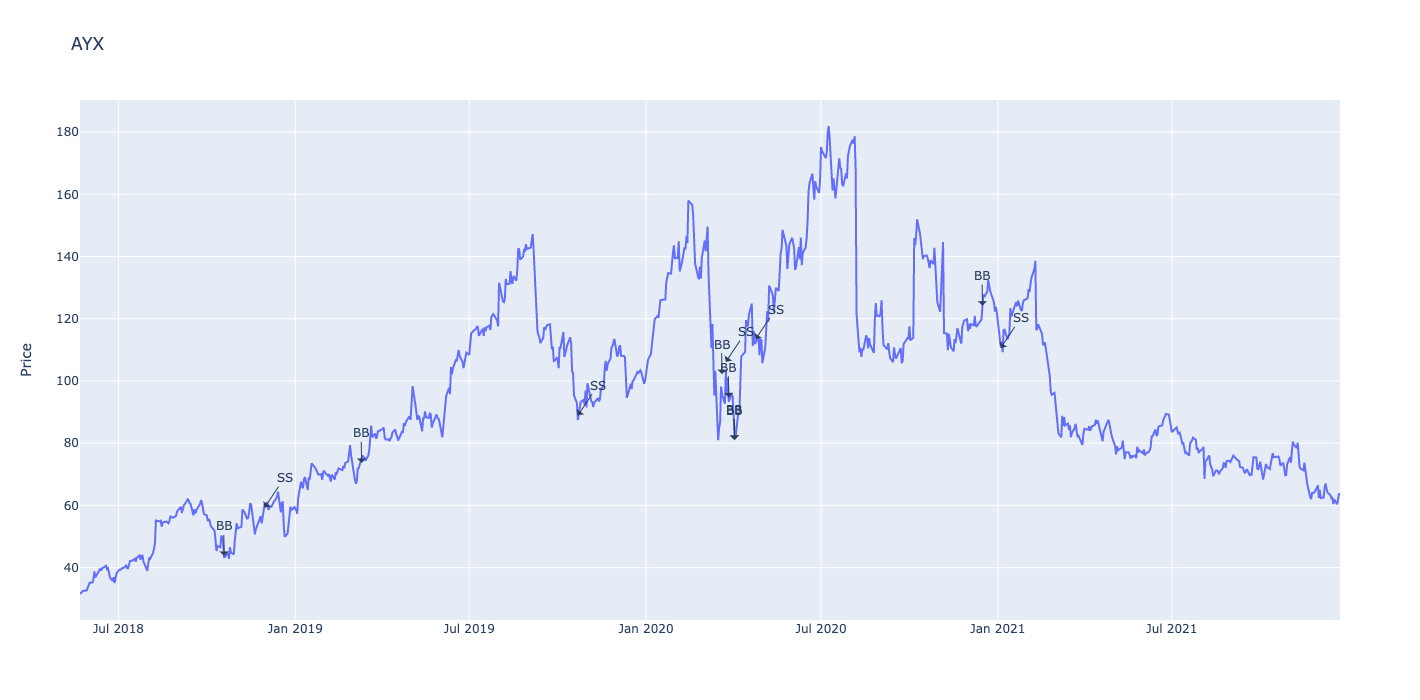

In [158]:
tg.plot_buysell_points(ticker = next(generator), tradesdf = stocks.trades_df)

### Analyzing hold time

In [159]:
stocks.add_hold_time()


Total runtime:  0.18 s


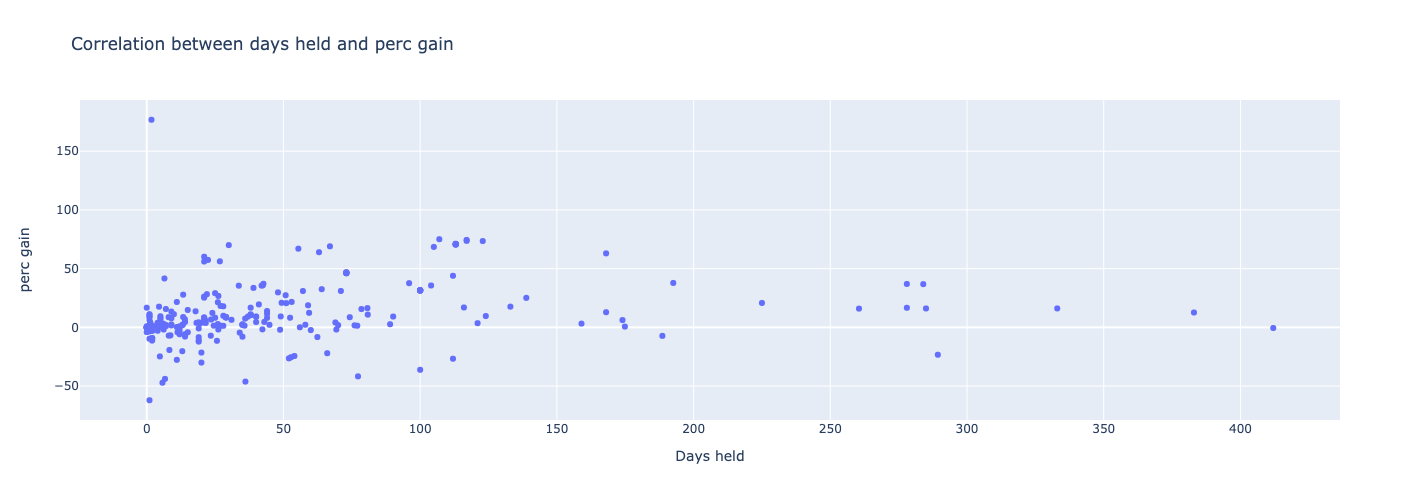

Pearson Correlation: 0.25

In [28]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x = sells['Days Held'], y = sells['Perc gain'], mode = 'markers', text = sells['Symbol']))

fig2.update_layout(title = 'Correlation between days held and perc gain', xaxis_title = 'Days held', yaxis_title = 'perc gain', width = 1000, height = 500)



fig2.show()

printmd("Pearson Correlation: " + str(round(sells['Days Held'].corr(sells['Perc gain']),3)))
print()

### Options trade history

In [30]:
r.export.export_completed_option_orders(dir_path = '.', file_name = 'My_option_orders.csv')
options = pd.read_csv('My_option_orders.csv')
options['order_created_at'] = options['order_created_at'].replace('T(.*)', '', regex=True)
options['order_created_at'] = pd.to_datetime(options['order_created_at'], format = '%Y-%m-%d')
options['expiration_date'] = pd.to_datetime(options['expiration_date'], format = '%Y-%m-%d')
options = options.iloc[::-1].reset_index(drop=True)

#correcting GME order glitch for one contract @ 20.5 strike
insert_order = pd.DataFrame(options.iloc[34].copy()).T
insert_order['price'], insert_order['processed_quantity'] = 0.09, 1

options1 = options.iloc[0:35]
options2 = options.iloc[35:]

option_orders = pd.concat([options1, insert_order, options2]).reset_index(drop=True)

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...


#### Examine option trades

In [68]:
options = et.Options(option_orders)

options.examine_trades()

In [71]:
options.trades_df.head(10)

Side Symbol Option Type   Strategy  Expiration  Strike        Date  \
0   buy   WORK        call  long_call  2020-07-17    48.0  2020-06-09   
1   buy     MA        call  long_call  2020-07-10   332.5  2020-06-11   
2   buy   SOXL        call  long_call  2020-07-17   260.0  2020-06-11   
3   buy   UVXY         put   long_put  2020-06-26    31.5  2020-06-12   
4   buy     WB         put   long_put  2020-07-31    29.0  2020-06-15   
5   buy    DIS        call  long_call  2020-07-24   165.0  2020-06-19   
6   buy    DAL        call  long_call  2020-08-21    55.0  2020-06-19   
7  sell   SOXL        call  long_call  2020-07-17   260.0  2020-06-22   
8  sell   UVXY         put   long_put  2020-06-26    31.5  2020-06-25   
9   buy     AA         put   long_put  2020-07-31    11.0  2020-07-02   

   Quantity  Avg_Price  Cur_Avg_Cost  Cur Quantity  Total   Gain   % Gain  \
0       1.0       0.20          0.20           1.0   20.0    0.0        0   
1       1.0       2.52          2.52           1.0  252.0    0.0        0   
2       1.0       2.00          2.00           1.0  200.0    0.0        0   
3       1.0       2.20          2.20           1.0  220.0    0.0        0   
4       1.0       0.95          0.95           1.0   95.0    0.0        0   
5       4.0       0.12          0.12           4.0   48.0    0.0        0   
6       2.0       0.33          0.33           2.0   66.0    0.0        0   
7       1.0       2.40          2.00           0.0  240.0   40.0    20.0%   
8       1.0       0.24          2.20           0.0   24.0 -196.0  -89.09%   
9       1.0       0.94          0.94           1.0   94.0    0.0        0   

  Expired  Net Gain/Loss  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
5                    0.0  
6                    0.0  
7                   40.0  
8                 -156.0  
9                 -156.0

#### Crypto trade history

In [80]:
#get all crypto orders
crypto_orders = pd.DataFrame(r.orders.get_all_crypto_orders(info=None))[['average_price', 'created_at', 'cumulative_quantity', 'currency_pair_id', 'rounded_executed_notional', 'side', 'state', 'type']]
crypto_orders.columns = ['average_price', 'date', 'quantity', 'currency_pair_id', 'total', 'side', 'state', 'type']
crypto_orders = crypto_orders[crypto_orders['state'] != 'canceled']

crypto_orders['date'] = crypto_orders['date'].replace('T(.*)', '', regex=True)
crypto_orders['date'] = pd.to_datetime(crypto_orders['date'], format = '%Y-%m-%d')
crypto_orders['average_price'] = crypto_orders['average_price'].astype(float)
crypto_orders['quantity'] = crypto_orders['quantity'].astype(float)
crypto_orders['total'] = crypto_orders['total'].astype(float)

currencies_info = pd.DataFrame(r.markets.get_currency_pairs(info='asset_currency'))[['code', 'id', 'name', 'type']]
currency_pair_ids = pd.DataFrame(r.markets.get_currency_pairs(info='id')).rename(columns = {0: 'currency_pair_id'})
currencies_info = pd.concat([currencies_info, currency_pair_ids], axis=1)
currencies_info = currencies_info[['code', 'currency_pair_id']].rename(columns = {'code':'symbol'})

crypto_orders = crypto_orders.merge(currencies_info, how = 'left', on = 'currency_pair_id')

crypto_orders = crypto_orders.iloc[::-1].dropna(subset = ['average_price']).reset_index(drop=True)


crypto_buyorders, crypto_sellorders = crypto_orders[crypto_orders['side'] == 'buy'], crypto_orders[crypto_orders['side'] == 'sell']

Found Additional pages.
Loading page 2 ...


#### Examine crypto trades

In [82]:
crypto = et.StocksCrypto(crypto_orders, crypto = 'yes')
crypto.examine_trades()
# crypto.add_price_diff()  

In [22]:
crypto.gains_df

Side Symbol        Date  Quantity  Avg_Price  Cur Quantity  Cur_Avg_Cost  \
0   sell    ETH  2021-01-10     16.71    1216.41          0.00       1023.89   
1   sell    LTC  2021-05-04      7.56     335.00          0.00        202.64   
2   sell    ETH  2021-01-30      2.00    1369.11          0.00       1231.11   
3   sell    ETH  2021-01-29      1.00    1357.52          2.05       1231.11   
4   sell   DOGE  2021-05-04    365.00       0.55          0.00          0.27   
5   sell   DOGE  2021-01-29  15470.00       0.08          0.00          0.07   
6   sell    ETH  2021-01-29      0.05    1369.08          2.00       1231.11   
7   sell    ETH  2021-01-26      0.08    1317.97          3.05       1231.11   
8   sell    ETH  2021-01-11      1.00    1103.00          0.00       1100.85   
9   sell   DOGE  2021-02-26   2187.00       0.06          0.00          0.05   
10  sell    BTC  2021-02-11      0.00   47806.37          0.00      39401.35   
11  sell    BTC  2020-12-17      0.00   23199.55          0.00      11746.20   
12  sell    ETH  2020-12-17      0.31     653.00          0.00        649.97   
13  sell    ETH  2021-02-11      0.00    1785.06          0.00       1674.59   

       Total     Gain   % Gain  Net Gain/Loss Free/Acquired Stock  
0   20327.87  3217.36    18.8%        3219.27                      
1    2531.57  1000.29   65.32%        4705.15                      
2    2738.21   276.00   11.21%        3608.98                      
3    1357.52   126.41   10.27%        3325.74                      
4     202.45   102.75  103.05%        3704.86                      
5    1160.76    76.10    7.02%        3199.33                      
6      71.87     7.24   11.21%        3332.98                      
7      99.95     6.59    7.06%        3123.23                      
8    1103.00     2.15     0.2%        3221.42                      
9     120.94     1.24    1.04%        3602.11                      
10      6.06     1.07   21.33%        3600.54                      
11      1.97     0.98   97.51%           0.98                      
12    200.92     0.93    0.47%           1.91                      
13      5.33     0.33     6.6%        3600.87

### Total Gain/Loss

In [36]:

total_gain = round(stocks.total_gain + crypto.total_gain + options.total_optionsgain, 2)
total_loss = round(stocks.total_loss + crypto.total_loss + options.total_optionsloss, 2)
net_gain_loss = round(total_gain + total_loss,2)

print(f'Total stock gain, loss: $ {round(stocks.total_gain,2)}, $ {round(stocks.total_loss,2)}')
print(f'Total crypto gain, loss: $ {round(crypto.total_gain,2)}, $ {round(crypto.total_loss,2)}')
print(f'Total option gain, loss: $ {round(options.total_optionsgain,2)}, $ {round(options.total_optionsloss,2)}')
print(f'Total gain: $ {total_gain}')
print(f'Total loss: $ {total_loss}')
print(f'Net Gain/Loss: $ {net_gain_loss}')
print()

Total stock gain, loss: $ 27749.08, $ -9661.97
Total crypto gain, loss: $ 3819.15, $ -114.29
Total option gain, loss: $ 9434.0, $ -14606.0
Total gain: $ 41002.23
Total loss: $ -24382.26
Net Gain/Loss: $ 16619.97



## Schwab

In [111]:
#parents1
parents1_schwaborders = pd.read_csv('Parents1_Schwab.csv', header=1, skipfooter=1, engine = 'python').drop('Unnamed: 8', axis=1)
parents1_schwaborders['Date'] = pd.to_datetime(parents1_schwaborders['Date'], format = '%m/%d/%Y')
parents1_schwaborders['Price'] = parents1_schwaborders['Price'].apply(lambda x: x.strip()[1:].replace(',', '')).astype(float)
parents1_schwaborders['Action'] = parents1_schwaborders['Action'].apply(lambda x: x.replace('Buy', 'buy') if x == 'Buy' else 'sell')
parents1_schwaborders.columns = ['date', 'side', 'symbol', 'description', 'quantity', 'average_price', 'fees & comm', 'amount']
parents1_schwaborders['amount'] = parents1_schwaborders['amount'].str.replace('[$,()]', '', regex = True).astype('float64')
parents1_schwaborders = parents1_schwaborders.rename(columns = {'amount':'total'}).iloc[::-1].reset_index(drop=True)



parents1_stocks = et.StocksCrypto(parents1_schwaborders)

parents1_stocks.examine_trades()
parents1_stocks.add_price_diff()



# parents1_stocks.trades_df.drop(columns = 'Free/Acquired Stock').to_excel('Parents1 Schwab Trades.xlsx')
# parents1_stocks.gains_df.to_excel('Parents1 Schwab Trades Gainers.xlsx')
# parents1_stocks.losses_df.to_excel('Parents1 Schwab Trades Losers.xlsx')

In [586]:
df = parents1_stocks.trades_df_with_price_diff.copy()


for i in range(len(df)):

    transac_date = pd.to_datetime(df.loc[i, 'Date'])
    symbol = df.loc[i, 'Symbol']

    if symbol == 'SOXL' and transac_date < pd.to_datetime('2021-03-02'):
        df.loc[i, 'Avg_Price'] /= 15

    if symbol == 'TECL' and transac_date < pd.to_datetime('2021-03-02'):
        df.loc[i, 'Avg_Price'] /= 10

    if symbol == 'AAPL' and transac_date < pd.to_datetime('2020-08-28'):
        df.loc[i, 'Avg_Price'] /= 4

    if symbol == 'TSLA' and transac_date < pd.to_datetime('2020-08-31'):
        df.loc[i, 'Avg_Price'] /= 5

In [78]:
#parents2
parents2_schwaborders = pd.read_csv('Parents2_Schwab.csv', header=1, skipfooter=1, engine = 'python').drop('Unnamed: 8', axis=1)
parents2_schwaborders['Date'] = pd.to_datetime(parents2_schwaborders['Date'], format = '%m/%d/%Y')
parents2_schwaborders['Price'] = parents2_schwaborders['Price'].apply(lambda x: x.strip()[1:].replace(',', '')).astype(float)
parents2_schwaborders['Action'] = parents2_schwaborders['Action'].apply(lambda x: x.replace('Buy', 'buy') if x == 'Buy' else 'sell')
parents2_schwaborders.columns = ['date', 'side', 'symbol', 'description', 'quantity', 'average_price', 'fees & comm', 'amount']
parents2_schwaborders['amount'] = parents2_schwaborders['amount'].str.replace('[$,()]', '').astype('float64')
parents2_schwaborders = parents2_schwaborders.rename(columns = {'amount':'total'}).iloc[::-1].reset_index(drop=True)




parents2_stocks = StocksCrypto(parents2_schwaborders)

parents2_stocks.examine_trades()
parents2_stocks.get_gainers_losers()
parents2_stocks.get_examined_trades_df()

display(parents2_stocks.trades_df)
display(parents2_stocks.gains_df)
display(parents2_stocks.losses_df)

# parents2_stocks.trades_df.drop(columns = 'Free/Acquired Stock').to_excel('Parents1 Schwab Trades.xlsx')
# parents2_stocks.gains_df.to_excel('Parents1 Schwab Trades Gainers.xlsx')
# parents2_stocks.losses_df.to_excel('Parents1 Schwab Trades Losers.xlsx')

Sell GME on 2021-01-29, Quantity: 6, Avg Price: $260.95, Current Avg Cost: 335.0, Total: $1565.67
Gain: $-444.3, % Gain: -22.1%, LOSS
Net Gain/Loss: $-444.3


Sell GME on 2021-01-29, Quantity: 5, Avg Price: $260.95, Current Avg Cost: 335.0, Total: $1304.72
Gain: $-370.25, % Gain: -22.1%, LOSS
Net Gain/Loss: $-814.55


Sell NCLH on 2021-02-05, Quantity: 21, Avg Price: $24.733, Current Avg Cost: 22.39, Total: $519.38
Gain: $49.29, % Gain: 10.49%
Net Gain/Loss: $-765.26


Sell RCL on 2021-02-08, Quantity: 16, Avg Price: $70.802, Current Avg Cost: 65.65, Total: $1132.8
Gain: $82.43, % Gain: 7.85%
Net Gain/Loss: $-682.83


Sell UAL on 2021-02-08, Quantity: 21, Avg Price: $44.2711, Current Avg Cost: 40.04, Total: $929.67
Gain: $88.94, % Gain: 10.58%
Net Gain/Loss: $-593.89


Sell NCLH on 2021-02-12, Quantity: 46, Avg Price: $23.4519, Current Avg Cost: 22.39, Total: $1078.77
Gain: $49.05, % Gain: 4.76%
Net Gain/Loss: $-544.84


Sell PLUG on 2021-02-19, Quantity: 23, Avg Price: $55.38, Current

Side Symbol        Date  Quantity  Avg_Price  Cur_Avg_Cost    Total  \
0    buy   PLUG  2021-01-26        16      73.59         73.59 -1177.44   
1    buy    GME  2021-01-28        11     335.00        335.00 -3685.00   
2   sell    GME  2021-01-29         6     260.95        335.00  1565.67   
3   sell    GME  2021-01-29         5     260.95        335.00  1304.72   
4    buy    AAL  2021-02-01        65      16.92         16.92 -1099.80   
5    buy   NCLH  2021-02-01        67      22.39         22.39 -1499.84   
6    buy    UAL  2021-02-01        37      40.04         40.04 -1481.32   
7    buy   JBLU  2021-02-01        70      14.41         14.41 -1008.41   
8    buy    RCL  2021-02-01        16      65.65         65.65 -1050.40   
9    buy   PLUG  2021-02-01         2      63.52         72.47  -127.03   
10   buy   PLUG  2021-02-01         5      63.49         70.52  -317.45   
11   buy   SAVE  2021-02-04         6      30.25         30.25  -181.52   
12  sell   NCLH  2021-02-05        21      24.73         22.39   519.38   
13  sell    RCL  2021-02-08        16      70.80         65.65  1132.80   
14  sell    UAL  2021-02-08        21      44.27         40.04   929.67   
15   buy    AAL  2021-02-09        20      17.48         17.05  -349.60   
16   buy   SAVE  2021-02-09         6      31.51         30.88  -189.05   
17   buy   QCOM  2021-02-09        10     146.91        146.91 -1469.10   
18   buy    NIO  2021-02-09         9      62.80         62.80  -565.20   
19   buy   UPST  2021-02-09         8      80.53         80.53  -644.26   
20   buy   SAVE  2021-02-09         3      31.21         30.95   -93.63   
21   buy     LI  2021-02-09        21      31.84         31.84  -668.62   
22   buy   XPEV  2021-02-09        16      48.91         48.91  -782.56   
23   buy   SAVE  2021-02-11        13      29.66         30.35  -385.57   
24   buy    AAL  2021-02-11        20      16.86         17.02  -337.20   
25  sell   NCLH  2021-02-12        46      23.45         22.39  1078.77   
26   buy    AAL  2021-02-18        20      17.68         17.12  -353.58   
27   buy   JBLU  2021-02-18        18      16.75         14.89  -301.57   
28   buy    NIO  2021-02-18         3      54.80         60.80  -164.40   
29   buy   UPST  2021-02-18         1      83.98         80.92   -83.98   
30   buy   UPST  2021-02-18         1      83.98         81.22   -83.98   
31   buy   UPST  2021-02-18        18      84.11         83.08 -1513.98   
32   buy    AAL  2021-02-18        10      17.71         17.16  -177.10   
33  sell   PLUG  2021-02-19        23      55.38         70.52  1273.71   
34   buy   UPST  2021-02-19         5      89.30         84.02  -446.50   
35   buy     BA  2021-02-22         3     214.03        214.03  -642.09   
36   buy   UPST  2021-02-22         6      77.79         83.06  -466.74   
37   buy     BA  2021-02-23         1     212.45        213.63  -212.45   
38   buy   UPST  2021-02-23         7      69.59         81.01  -487.13   
39  sell   JBLU  2021-02-23        88      19.10         14.89  1680.79   
40  sell   SAVE  2021-02-23         2      38.12         30.35    76.24   
41  sell   SAVE  2021-02-23         5      38.12         30.35   190.60   
42  sell   SAVE  2021-02-23        21      38.12         30.35   800.52   
43   buy   SAVE  2021-02-24        20      36.85         36.85  -737.00   
44   buy     LI  2021-02-25        25      27.73         29.61  -693.35   
45   buy    NIO  2021-02-25        20      49.83         53.94  -996.60   
46   buy   XPEV  2021-02-25        20      36.79         42.17  -735.73   
47   buy     BA  2021-02-25         1     224.56        215.82  -224.57   
48  sell    AAL  2021-02-25       135      21.01         17.16  2836.53   
49   buy     BA  2021-02-25         1     215.90        215.83  -215.90   
50  sell    UAL  2021-02-26        16      53.06         40.04   848.96   
51   buy   XPEV  2021-02-26        11      34.22         40.31  -376.38   
52   buy   QCOM  2021-03-01  

Symbol        Date  Quantity  Avg_Price    Gain  % Gain
0     AAL  2021-02-25       135    21.0114  519.26  22.41%
1    UPST  2021-03-18        46    89.1201  372.96  10.01%
2    JBLU  2021-02-23        88    19.1000  370.82  28.31%
3     UAL  2021-02-26        16    53.0600  208.39  32.53%
4    SAVE  2021-02-23        21    38.1200  163.20  25.61%
5     UAL  2021-02-08        21    44.2711   88.94  10.58%
6     RCL  2021-02-08        16    70.8020   82.43   7.85%
7    NCLH  2021-02-05        21    24.7330   49.29  10.49%
8    NCLH  2021-02-12        46    23.4519   49.05   4.76%
9    SAVE  2021-02-23         5    38.1200   38.86  25.61%
10   SAVE  2021-02-23         2    38.1200   15.54  25.61%

Symbol        Date  Quantity  Avg_Price    Gain   % Gain
0    GME  2021-01-29         6     260.95 -444.30   -22.1%
1    GME  2021-01-29         5     260.95 -370.25   -22.1%
2   PLUG  2021-02-19        23      55.38 -348.18  -21.47%

In [105]:
#grandpa

grandpa_schwab = pd.read_csv('Grandpa_Schwab.csv', header=1, skipfooter=1, engine = 'python').drop('Unnamed: 8', axis=1)
grandpa_schwab['Date'] = pd.to_datetime(grandpa_schwab['Date'], format = '%m/%d/%Y')
grandpa_schwab['Price'] = grandpa_schwab['Price'].apply(lambda x: x.strip()[1:].replace(',', '')).astype(float)
grandpa_schwab.columns = ['date', 'side', 'symbol', 'description', 'quantity', 'average_price', 'fees & comm', 'amount']
grandpa_schwab['amount'] = grandpa_schwab['amount'].str.replace('[$,()]', '').astype('float64')
grandpa_schwab = grandpa_schwab.rename(columns = {'amount':'total'}).iloc[::-1].reset_index(drop=True)


grandpa_schwab_stocks = grandpa_schwab[~grandpa_schwab['description'].str.contains('PUT') & ~grandpa_schwab['description'].str.contains('CALL')].reset_index(drop=True)
grandpa_schwab_stocks['side'] = grandpa_schwab_stocks['side'].apply(lambda x: 'buy' if x == 'Buy' else 'sell')


grandpa_schwab_options = grandpa_schwab[grandpa_schwab['description'].str.contains('PUT') | grandpa_schwab['description'].str.contains('CALL')].reset_index(drop=True)

def replace_action(item):
    if item == 'Buy to Open':
        return 'buy'
        
    elif item == 'Sell to Close':
        return 'sell'
        
    elif item == 'Sell to Open':
        return 'sell'
    
    elif item == 'Buy to Close':
        return 'buy'


grandpa_schwab_options['side'] = grandpa_schwab_options['side'].apply(replace_action)


grandpa_schwab_options[['symbol', 'expiration_date', 'strike_price','option_type']] = grandpa_schwab_options['symbol'].str.split(expand=True) 
grandpa_schwab_options['expiration_date'] = pd.to_datetime(grandpa_schwab_options['expiration_date'], format = '%m/%d/%Y')
grandpa_schwab_options['option_type'] = grandpa_schwab_options['option_type'].apply(lambda x: 'Put' if x == 'P' else 'Call')
grandpa_schwab_options.rename(columns = {'date':'order_created_at', 'symbol':'chain_symbol', 'quantity':'processed_quantity', 'average_price':'price'}, inplace=True)
grandpa_schwab_options.drop('description', axis=1, inplace=True)

In [115]:
grandpa_stocks = StocksCrypto(grandpa_schwab_stocks)

grandpa_stocks.examine_trades()
grandpa_stocks.add_price_diff()


# grandpa_stocks.trades_df.drop(columns = 'Free/Acquired Stock').to_excel('Parents1 Schwab Trades.xlsx')
# grandpa_stocks.gains_df.to_excel('Parents1 Schwab Trades Gainers.xlsx')
# grandpa_stocks.losses_df.to_excel('Parents1 Schwab Trades Losers.xlsx')


# grandpa_options = Options(grandpa_schwab_options)

# grandpa_options.examine_trades()
# grandpa_options.get_gains_losses()

# display(grandpa_options.gains_df)
# display(grandpa_options.losses_df)

Sell V on 2020-04-28, Quantity: 6.0, Avg Price: $173.1421, Current Avg Cost: 169.88, Total: $1038.83
Gain: $19.57, % Gain: 1.92%
Net Gain/Loss: $19.57


Sell SPY on 2020-06-01, Quantity: 2.0, Avg Price: $305.765, Current Avg Cost: 294.25, Total: $611.52
Gain: $23.03, % Gain: 3.91%
Net Gain/Loss: $42.6


Sell BRKB on 2020-06-11, Quantity: 20.0, Avg Price: $179.695, Current Avg Cost: 180.06, Total: $3593.82
Gain: $-7.4, % Gain: -0.21%, LOSS
Net Gain/Loss: $35.2


Sell MAR on 2020-06-11, Quantity: 39.0, Avg Price: $91.68, Current Avg Cost: 84.34, Total: $3575.44
Gain: $286.19, % Gain: 8.7%
Net Gain/Loss: $321.39


Sell HLT on 2020-06-11, Quantity: 50.0, Avg Price: $78.058, Current Avg Cost: 76.31, Total: $3902.81
Gain: $87.48, % Gain: 2.29%
Net Gain/Loss: $408.87


Sell MA on 2020-06-11, Quantity: 8.0, Avg Price: $293.6253, Current Avg Cost: 258.65, Total: $2348.95
Gain: $279.81, % Gain: 13.52%
Net Gain/Loss: $688.68


Sell V on 2020-06-11, Quantity: 6.0, Avg Price: $189.935, Current Avg 

Side Symbol        Date  Quantity  Avg_Price  Cur_Avg_Cost    Total  \
0    buy    MAR  2020-04-23     14.00      80.98         80.98 -1133.72   
1    buy     MA  2020-04-23      6.00     256.65        256.65 -1539.88   
2    buy      V  2020-04-23      6.00     166.57        166.57  -999.42   
3    buy      V  2020-04-28      6.00     173.19        169.88 -1039.14   
4   sell      V  2020-04-28      6.00     173.14        169.88  1038.83   
5    buy    HLT  2020-04-28     20.00      75.49         75.49 -1509.79   
6    buy     MA  2020-04-28      2.00     264.65        258.65  -529.31   
7    buy    HLT  2020-05-01     15.00      71.84         73.93 -1077.68   
8    buy    MAR  2020-05-01     22.00      84.65         83.22 -1862.30   
9    buy    SPY  2020-05-06      3.00     286.50        286.50  -859.50   
10   buy    HLT  2020-05-26     14.00      81.84         76.19 -1145.76   
11   buy    HLT  2020-05-26      1.00      82.20         76.31   -82.20   
12   buy   BRKB  2020-05-26     20.00     180.06        180.06 -3601.30   
13   buy    MAR  2020-05-27      3.00      97.77         84.34  -293.31   
14   buy    SPY  2020-06-01      2.00     305.88        294.25  -611.75   
15  sell    SPY  2020-06-01      2.00     305.76        294.25   611.52   
16  sell   BRKB  2020-06-11     20.00     179.70        180.06  3593.82   
17  sell    MAR  2020-06-11     39.00      91.68         84.34  3575.44   
18  sell    HLT  2020-06-11     50.00      78.06         76.31  3902.81   
19  sell     MA  2020-06-11      8.00     293.63        258.65  2348.95   
20  sell      V  2020-06-11      6.00     189.94        169.88  1139.58   
21  sell      V  2020-06-11      0.01     189.94        169.88     1.73   
22  sell    SPY  2020-06-12      3.00     300.18        294.25   900.53   
23   buy    HLT  2020-06-15     30.00      77.92         77.92 -2337.45   
24  sell    HLT  2020-06-22     30.00      76.34         77.92  2290.30   
25   buy   AMZN  2020-06-22      2.00    2703.10       2703.10 -5406.20   
26   buy   AMZN  2020-06-22      1.00    2704.25       2703.48 -2704.25   
27   buy   SOXL  2020-06-22     19.00     184.88        184.88 -3512.77   
28   buy   WORK  2020-06-22     65.00      34.12         34.12 -2217.80   
29   buy    DFS  2020-06-23     46.00      54.83         54.83 -2522.11   
30  sell   AMZN  2020-06-23      3.00    2761.79       2703.48  8285.19   
31   buy   MSFT  2020-06-23     20.00     202.10        202.10 -4042.00   
32   buy     BA  2020-07-02     12.00     181.03        181.03 -2172.32   
33   buy   EVBG  2020-07-06     20.00     147.57        147.57 -2951.40   
34   buy    NIO  2020-07-08    250.00      12.97         12.97 -3241.55   
35  sell   SOXL  2020-07-30      1.00     229.98        184.88   229.97   
36  sell   MSFT  2020-08-07      5.00     212.37        202.10  1061.83   
37   buy    NIO  2020-08-07     75.00      13.41         13.07 -1006.07   
38  sell   MSFT  2020-08-25      1.00     216.16        202.10   216.16   
39   buy   MSFT  2020-08-26      1.00     220.79        203.35  -220.79   
40  sell   MSFT  2020-09-03     15.00     220.03        203.35  3300.31   
41  sell    NIO  2020-09-03    325.00      18.80         13.07  6111.23   
42  sell   SOXL  2020-09-03     18.00     261.20        184.88  4701.57   
43   buy   EVBG  2020-09-04     10.00     126.97        140.70 -1269.70   
44  sell   EVBG  2020-09-08     30.00     121.81        140.70  3654.32   
45  sell     BA  2020-09-08     12.00     162.11        181.03  1945.23   
46   buy   WORK  2020-09-09     50.00      24.70         30.02 -1235.00   
47  sell    DFS  2020-10-09     46.00      64.90         54.83  2985.10   
48   buy    NIO  2020-10-14     90.00      26.59         26.59 -2393.32   
49   buy    NIO  2020-11-03     70.00      34.97         30.26 -2447.90   
50   buy     SQ  2020-11-11     20.00     183.60        183.60 -3672.00   
51   buy    NIO  2020-11-13     30.00      44.57         32.52 -1337.10   
52   buy    NIO  2020-11-13  

Symbol        Date  Quantity  Avg_Price     Gain               % Gain
0     NIO  2020-09-03  325.0000    18.8042  1863.75               43.88%
1    SOXL  2020-09-03   18.0000   261.2038  1373.78               41.28%
2     DFS  2021-02-25   50.0000    95.4690   884.95               22.76%
3     NIO  2021-01-29   35.0000    58.4501   794.63               63.51%
4    WORK  2020-11-25  115.0000    36.8150   780.93               22.62%
5      SQ  2021-02-08    8.0000   257.6001   555.65               36.92%
6     DFS  2020-10-09   46.0000    64.8950   463.06               18.36%
7      SQ  2021-02-19    5.0000   276.3111   440.84               46.86%
8    NCLH  2021-03-01  100.0000    29.8450   344.92               13.07%
9     MAR  2020-06-11   39.0000    91.6800   286.19                 8.7%
10     MA  2020-06-11    8.0000   293.6253   279.81               13.52%
11   MSFT  2020-09-03   15.0000   220.0254   250.19                 8.2%
12    NIO  2021-02-05   10.0000    56.5816   208.35               58.29%
13     SQ  2021-02-05    4.0000   240.1433   208.00               27.64%
14   AMZN  2020-06-23    3.0000  2761.7897   174.92                2.16%
15      V  2020-06-11    6.0000   189.9350   120.33               11.81%
16     SQ  2021-02-19    1.0000   276.2800    88.14               46.84%
17    HLT  2020-06-11   50.0000    78.0580    87.48                2.29%
18   MSFT  2020-08-07    5.0000   212.3693    51.35                5.08%
19   SOXL  2020-07-30    1.0000   229.9800    45.10               24.39%
20    SPY  2020-06-01    2.0000   305.7650    23.03                3.91%
21      V  2020-04-28    6.0000   173.1421    19.57                1.92%
22    SPY  2020-06-12    3.0000   300.1833    17.80                2.02%
23   MSFT  2020-08-25    1.0000   216.1647    14.06                6.96%
24      V  2020-06-11    0.0091   189.9350     1.73  Free/Acquired Stock

Symbol        Date  Quantity  Avg_Price    Gain   % Gain
0   EVBG  2020-09-08      30.0   121.8133 -566.70  -13.43%
1     BA  2020-09-08      12.0   162.1060 -227.05  -10.45%
2    HLT  2020-06-22      30.0    76.3450  -47.10   -2.02%
3    DAL  2021-01-07      12.0    40.4019  -23.26   -4.58%
4   BRKB  2020-06-11      20.0   179.6950   -7.40   -0.21%

In [9]:
#Jeff IRA
jeff_ira_schwab = pd.read_csv('Jeff_IRA_Schwab.csv', header=1, skipfooter=1, engine = 'python').drop('Unnamed: 8', axis=1)
jeff_ira_schwab['Date'] = pd.to_datetime(jeff_ira_schwab['Date'], format = '%m/%d/%Y')
jeff_ira_schwab = jeff_ira_schwab.iloc[::-1].reset_index(drop=True)
jeff_ira_schwab['Price'] = jeff_ira_schwab['Price'].apply(lambda x: x.strip()[1:].replace(',', '') if x is not np.nan else '0').astype(float)

#correcting WFC+P
insert_order = pd.DataFrame(jeff_ira_schwab.iloc[261].copy()).T
insert_order['Action'], insert_order['Price'], insert_order['Quantity'] = 'Sell', 25, 1200

jeff_ira_schwab1, jeff_ira_schwab2 = jeff_ira_schwab.iloc[0:261], jeff_ira_schwab.iloc[263:]


jeff_ira_schwab = pd.concat([jeff_ira_schwab1, insert_order, jeff_ira_schwab2]).reset_index(drop=True)

jeff_ira_schwab['Action'] = jeff_ira_schwab['Action'].apply(lambda x: 'buy' if x == 'Buy' else 'sell')
jeff_ira_schwab.columns = ['date', 'side', 'symbol', 'description', 'quantity', 'average_price', 'fees & comm', 'amount']
jeff_ira_schwab['amount'] = jeff_ira_schwab['amount'].str.replace('[$,()]', '', regex=True).astype('float64')
jeff_ira_schwab.rename(columns = {'amount':'total'}, inplace=True)


jeff_ira_stocks = et.StocksCrypto(jeff_ira_schwab)

jeff_ira_stocks.examine_trades()
jeff_ira_stocks.add_price_diff()

# display(jeff_ira_stocks.trades_df_with_price_diff)
# display(jeff_ira_stocks.gains_df_with_price_diff)
# display(jeff_ira_stocks.losses_df_with_price_diff)



# jeff_ira_stocks.trades_df.drop(columns = 'Free/Acquired Stock').to_excel('Jeff IRA Trades.xlsx')
# jeff_ira_stocks.gains_df.to_excel('Jeff IRA Trades Gainers.xlsx')
# jeff_ira_stocks.losses_df.to_excel('Jeff IRA Trades Losers.xlsx')

- SWSXX: No data found for this date range, symbol may be delisted
- GNC: No data found, symbol may be delisted
- WFC+P: No data found, symbol may be delisted


In [576]:
df = jeff_ira_stocks.trades_df_with_price_diff.copy()


for i in range(len(df)):

    transac_date = pd.to_datetime(df.loc[i, 'Date'])
    symbol = df.loc[i, 'Symbol']

    if symbol == 'SOXL' and transac_date < pd.to_datetime('2021-03-02'):
        df.loc[i, 'Avg_Price'] /= 15

    if symbol == 'TECL' and transac_date < pd.to_datetime('2021-03-02'):
        df.loc[i, 'Avg_Price'] /= 10

    if symbol == 'AAPL' and transac_date < pd.to_datetime('2020-08-28'):
        df.loc[i, 'Avg_Price'] /= 4

    if symbol == 'TSLA' and transac_date < pd.to_datetime('2020-08-31'):
        df.loc[i, 'Avg_Price'] /= 5

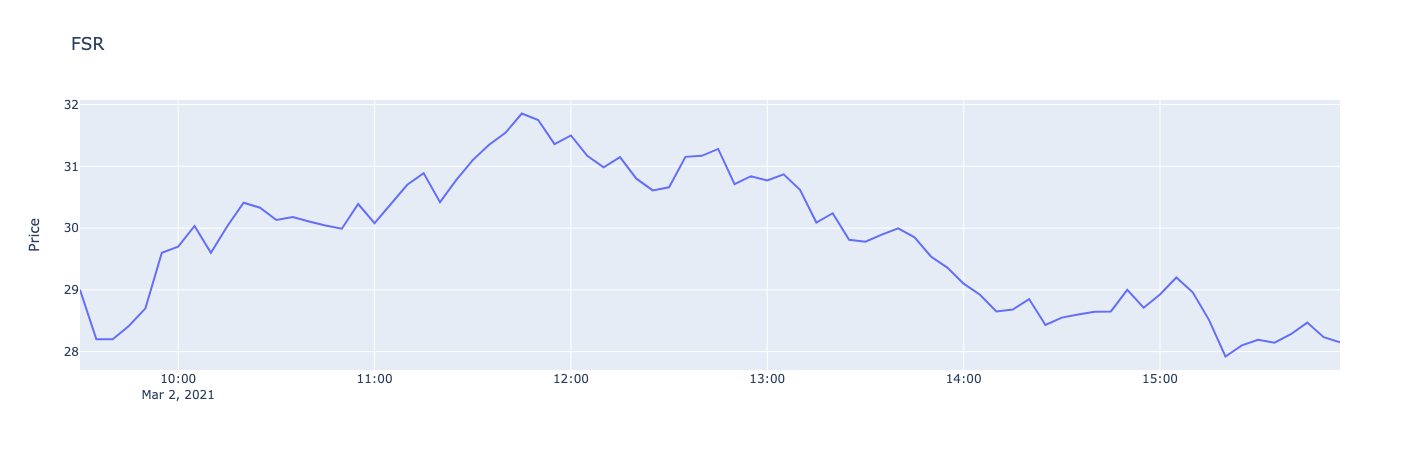

In [569]:
ticker_obj = yf.Ticker('FSR')
ticker_hist = ticker_obj.history(start = '2021-03-02', end = '2021-03-03', interval = '5m')

closing_prices = ticker_hist['Close']

fig = go.Figure()
fig.add_trace(go.Scatter(x = ticker_hist.index, y = closing_prices, mode = 'lines', name = 'Close'))



fig.update_layout(title = 'FSR', yaxis_title = 'Price')


fig.show()

In [173]:
#Jeff Individual

jeff_individual = pd.read_csv('Jeff_Individual_Schwab.csv', header=1, skipfooter=1, engine = 'python').drop('Unnamed: 8', axis=1)
jeff_individual['Date'] = pd.to_datetime(jeff_individual['Date'], format = '%m/%d/%Y')
jeff_individual['Price'] = jeff_individual['Price'].apply(lambda x: x.strip()[1:].replace(',', '')).astype(float)
jeff_individual['Action'] = jeff_individual['Action'].apply(lambda x: 'buy' if x == 'Buy' else 'sell')
jeff_individual.columns = ['date', 'side', 'symbol', 'description', 'quantity', 'average_price', 'fees & comm', 'amount']
jeff_individual['amount'] = jeff_individual['amount'].str.replace('[$,()]', '', regex=True).astype('float64')
jeff_individual = jeff_individual.rename(columns = {'amount':'total'}).iloc[::-1].reset_index(drop=True)

jeff_individual.loc[25, 'quantity'], jeff_individual.loc[25, 'average_price'] =  jeff_individual.loc[25, 'quantity']*10, jeff_individual.loc[25, 'average_price']/10

jeff_individual_stocks = et.StocksCrypto(jeff_individual)

jeff_individual_stocks.examine_trades()
jeff_individual_stocks.add_price_diff()


### Short intervals

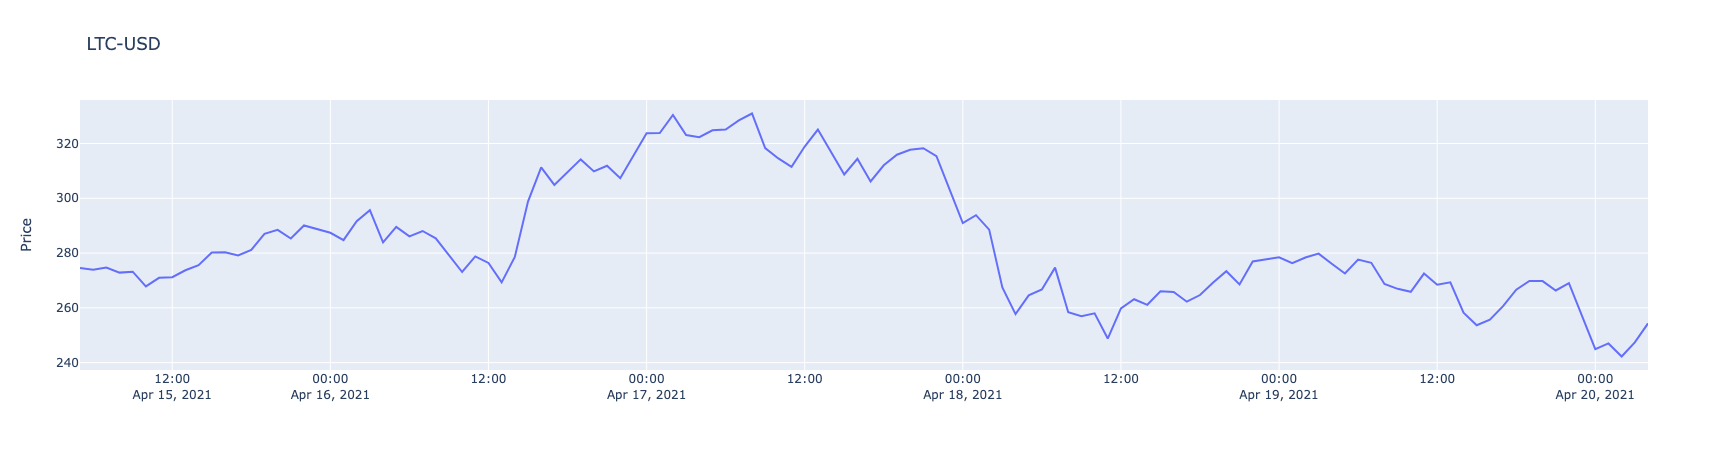

In [16]:
ticker = 'LTC-USD'
ticker_obj = yf.Ticker(ticker)
ticker_hist = ticker_obj.history(start = '2021-04-15', end = '2021-04-20', interval = '1h')

closing_prices = ticker_hist['Close']

fig = go.Figure()
fig.add_trace(go.Scatter(x = ticker_hist.index, y = closing_prices, mode = 'lines', name = 'Close'))



fig.update_layout(title = ticker, yaxis_title = 'Price')


fig.show()